# PSO PARA PID

## IMPORTS

In [1]:
import random
import math    
import copy    
import numpy as np
import matplotlib.pyplot as plt
from PID import PID
import Medidas
import PSO
import pandas as pd
import warnings
from time import time

warnings.filterwarnings('ignore')

## FUNÇÃO DE TRANSFORMAÇÃO DO SISTEMA PARA UM DATASET

In [2]:
def sistema2df(sistema,path):
    iteracao = list()
    feature = list()
    passarinho = 0

    columns = ["P","I","D","P_pbest","I_pbest","D_pbest","P_gbest","I_gbest","D_gbest","V_p","V_i","V_d","erro","erro_gbest","I"]

    for passarinho in range(10):
        iteracao = list()
        for iter in range(len(sistema)):
            feature = list()

            feature.append(copy.deepcopy(sistema[iter][passarinho].X[0]))
            feature.append(sistema[iter][passarinho].X[1])
            feature.append(sistema[iter][passarinho].X[2])
            feature.append(sistema[iter][passarinho].pbest[0])
            feature.append(sistema[iter][passarinho].pbest[1])
            feature.append(sistema[iter][passarinho].pbest[2])
            feature.append(sistema[iter][passarinho].gbest[0])
            feature.append(sistema[iter][passarinho].gbest[1])
            feature.append(sistema[iter][passarinho].gbest[2])
            feature.append(sistema[iter][passarinho].V[0])
            feature.append(sistema[iter][passarinho].V[1])
            feature.append(sistema[iter][passarinho].V[2])
            feature.append(sistema[iter][passarinho].erro)
            feature.append(sistema[iter][passarinho].erro_gbest)
            feature.append(sistema[iter][passarinho].I)
            
            iteracao.append(feature)
        
        df = pd.DataFrame(iteracao, columns=columns)
        new_path = path + "/passarinho" + str(passarinho) + ".csv"
        df.to_csv(new_path)

## PLOTANDO A MALHA ABERTA

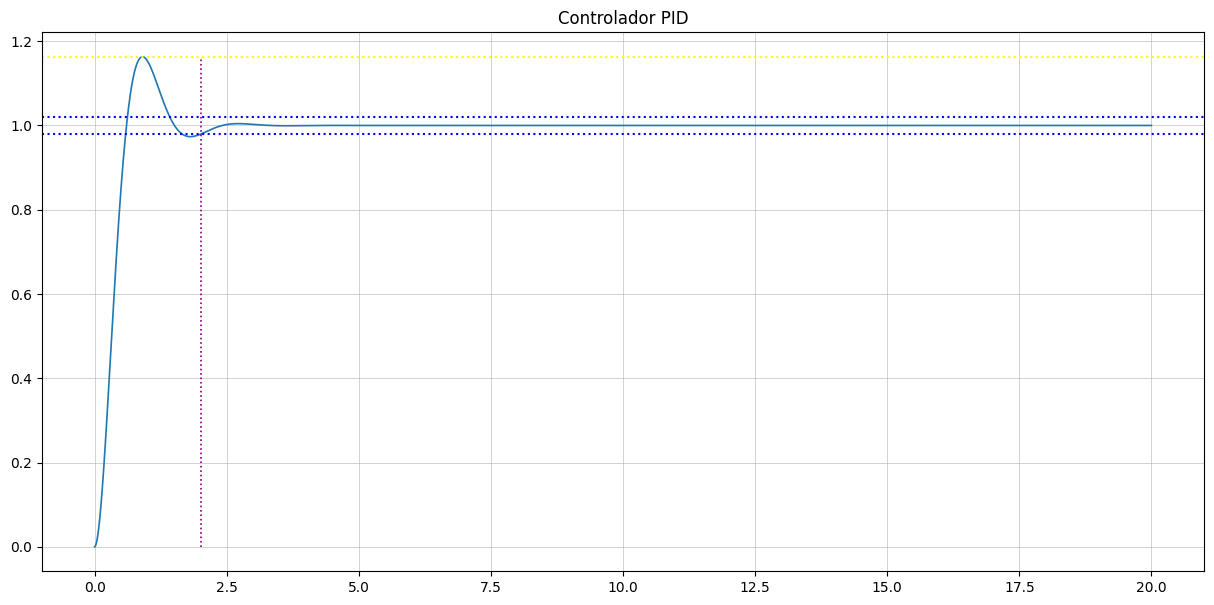

In [3]:
num = [16]
den = [1, 4, 16]
set_point = 1.0

erro = list()
pid_param = list()

pid_param.append(num)
pid_param.append(den)
pid_param.append(set_point)

pid = PID(num,den)

erro.append(Medidas.Tempo_Acomodacao(pid, ma= True))
erro.append(Medidas.Overshoot(pid, ma = True))

Y,_ ,T = pid.resposta_MA()

pid.plot_MA(Y, T, erro)

## PLOTANDO MALHA FECHADA

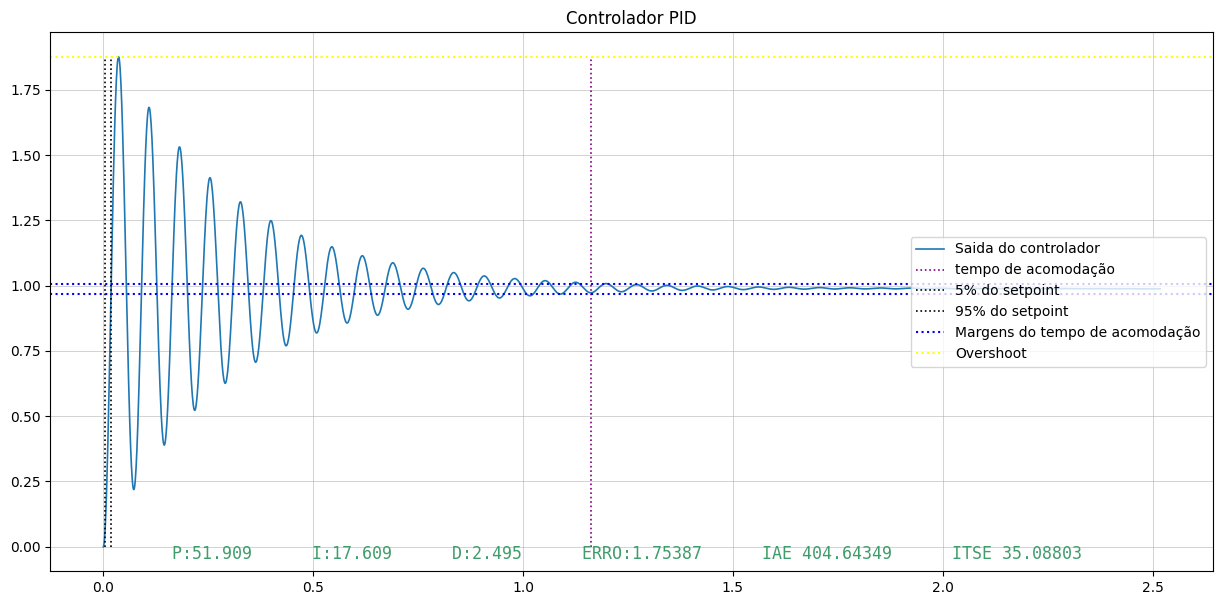

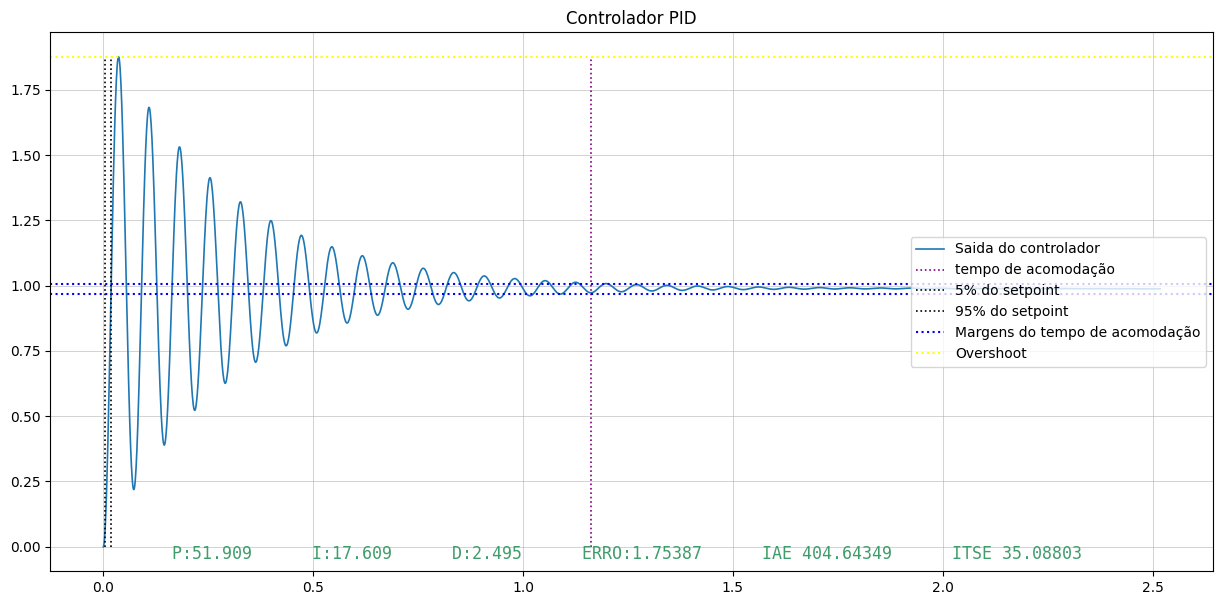

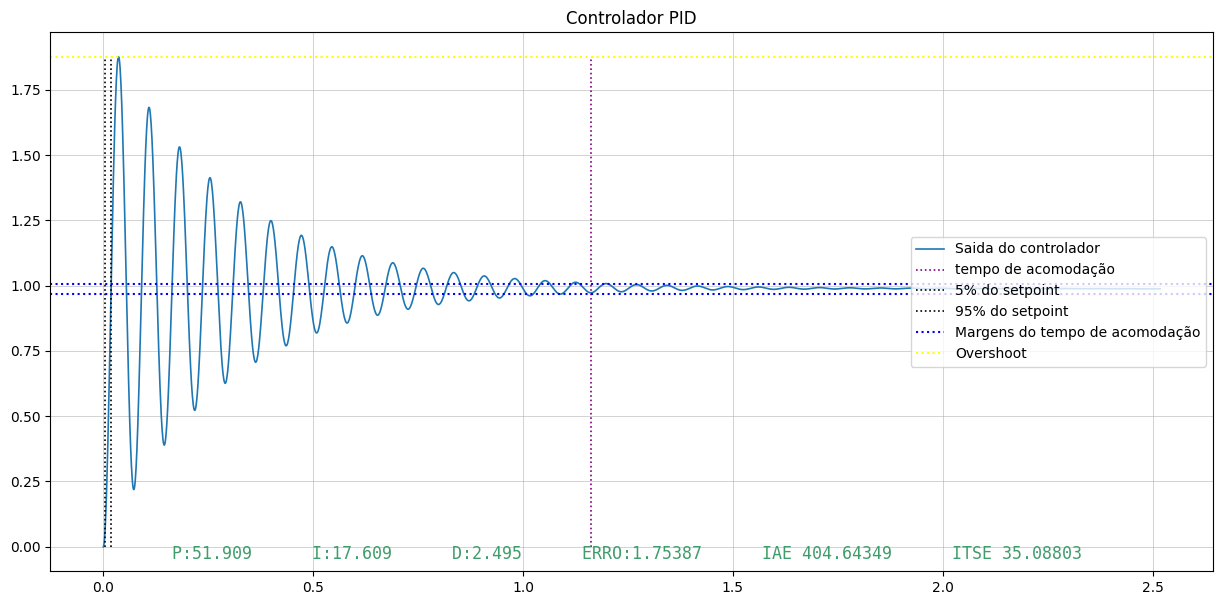

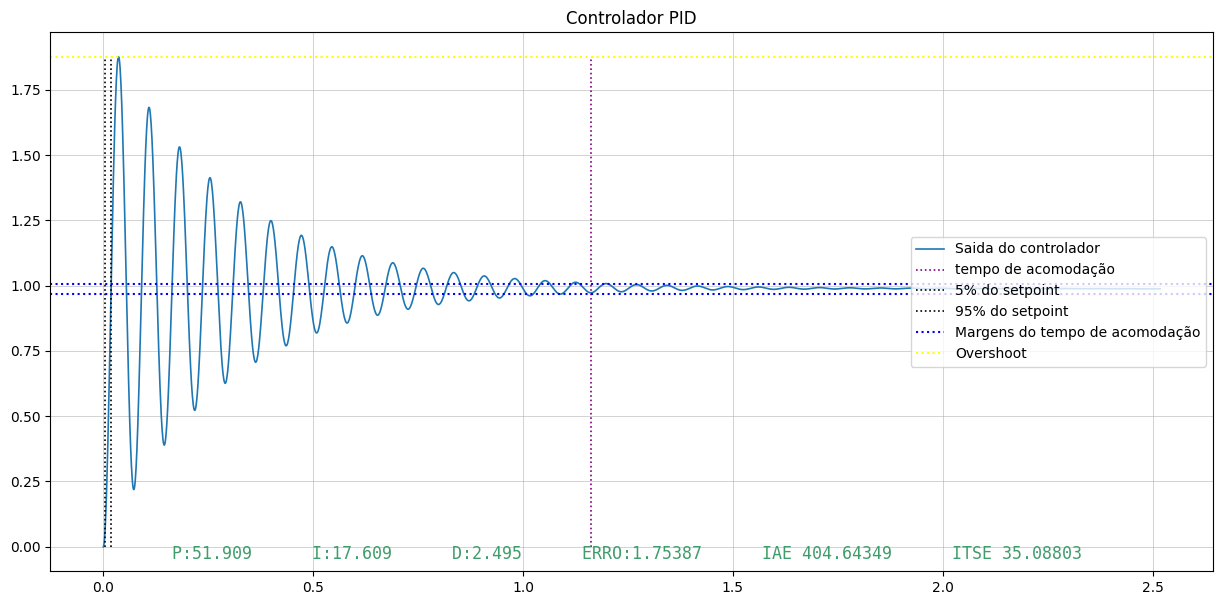

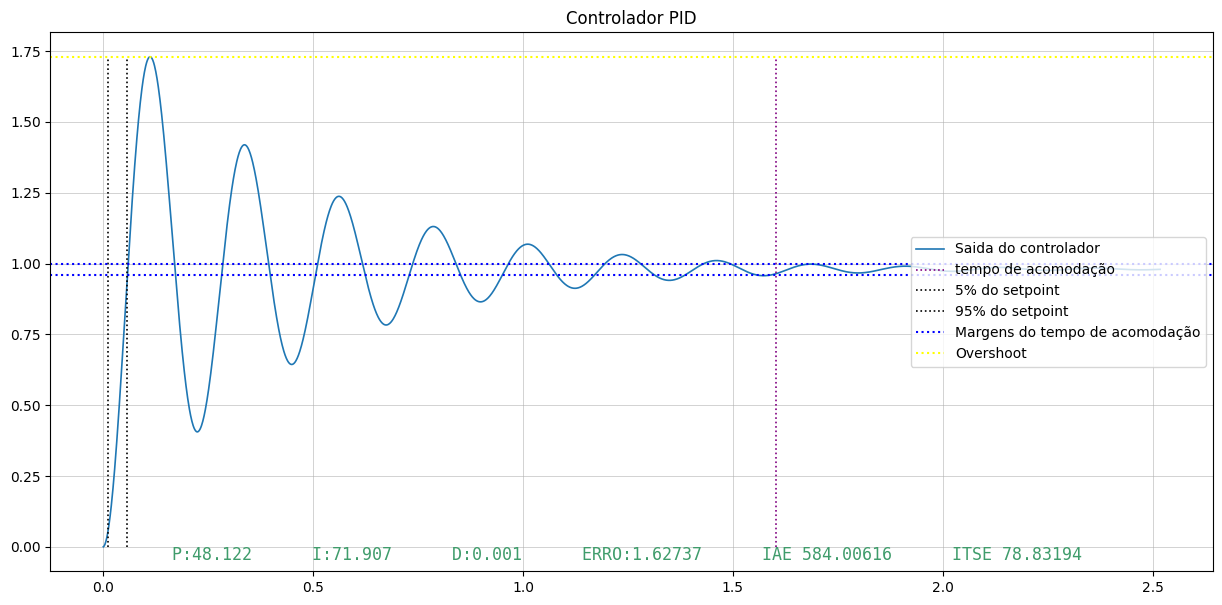

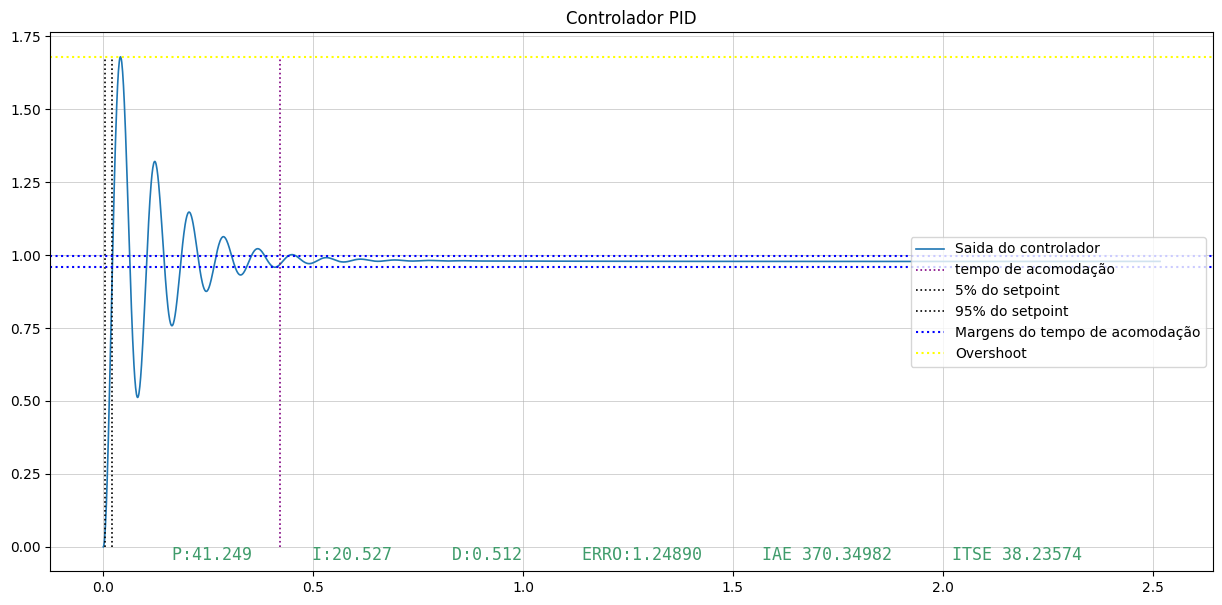

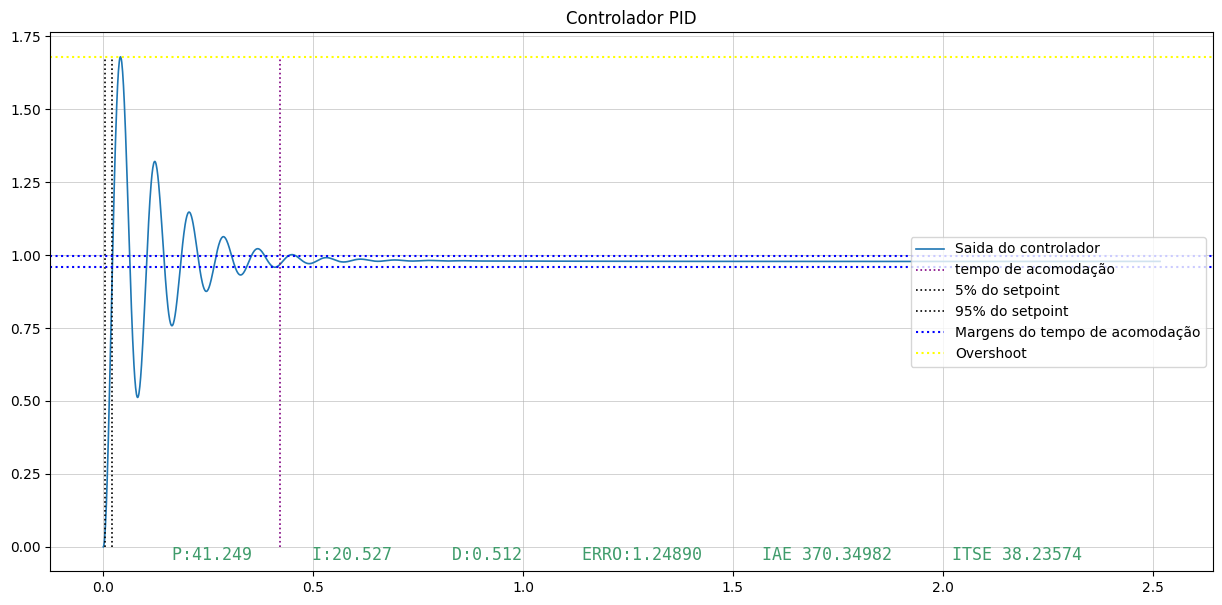

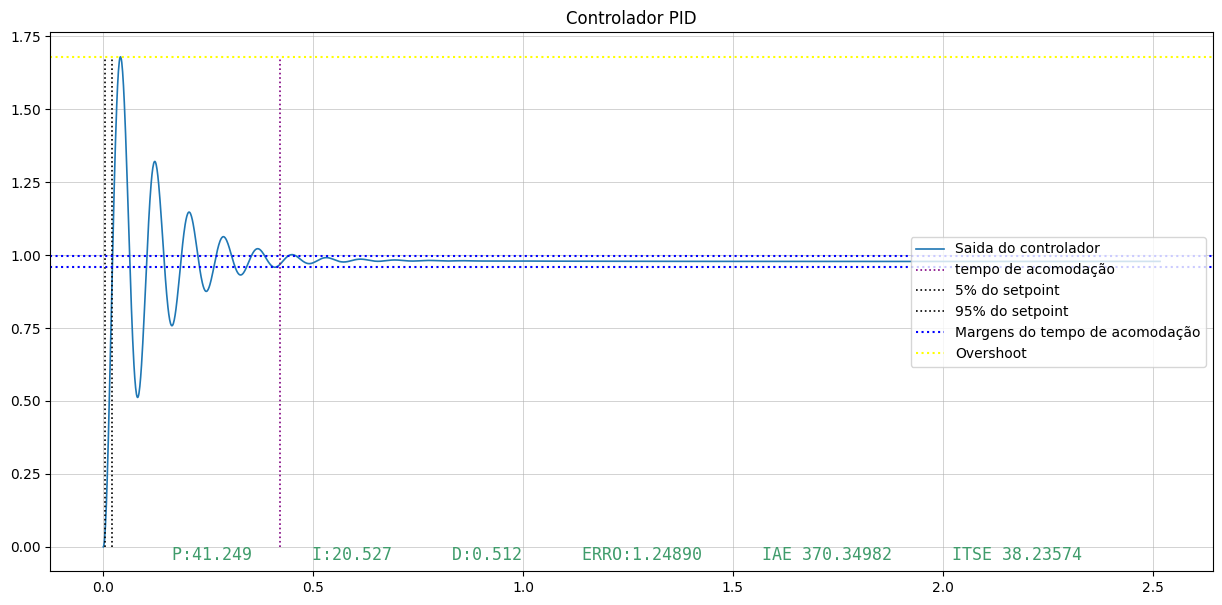

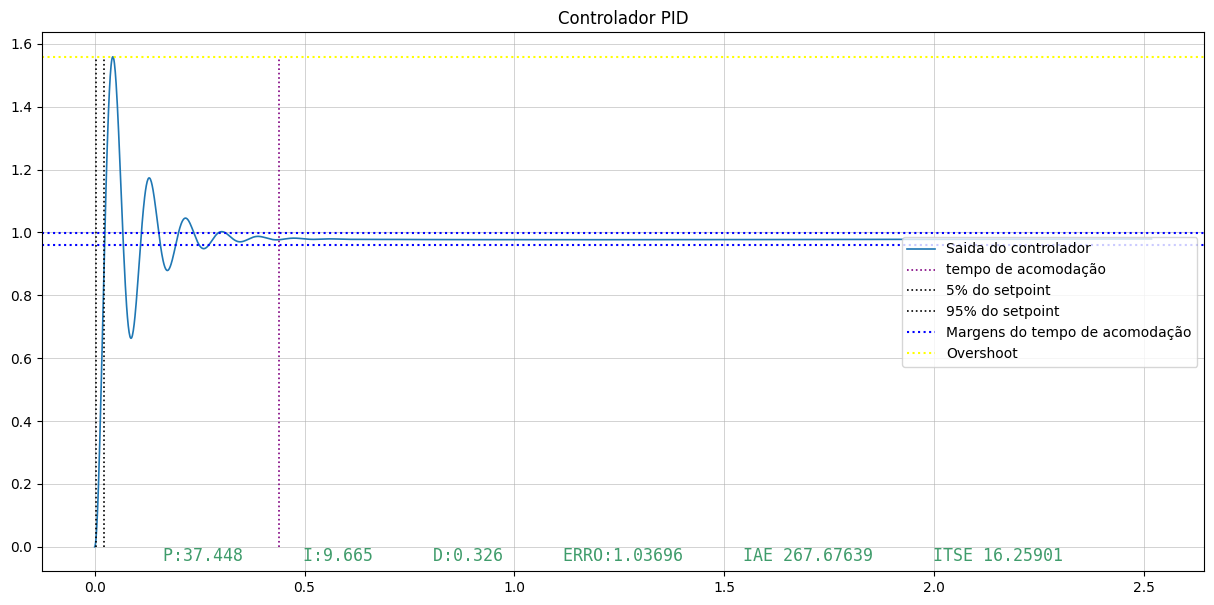

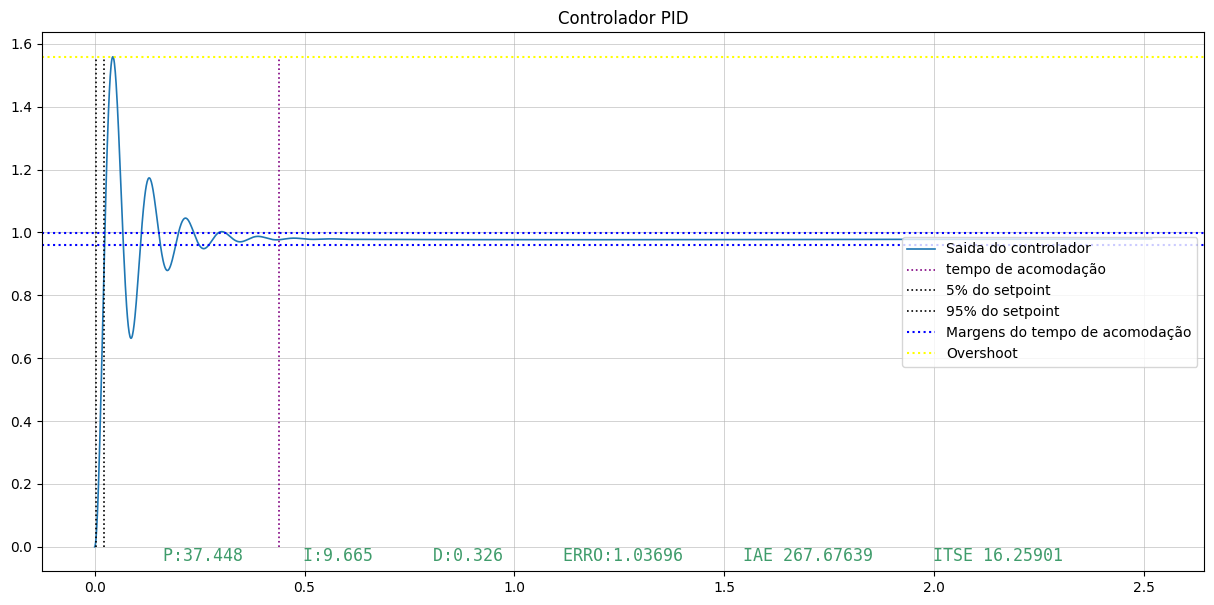

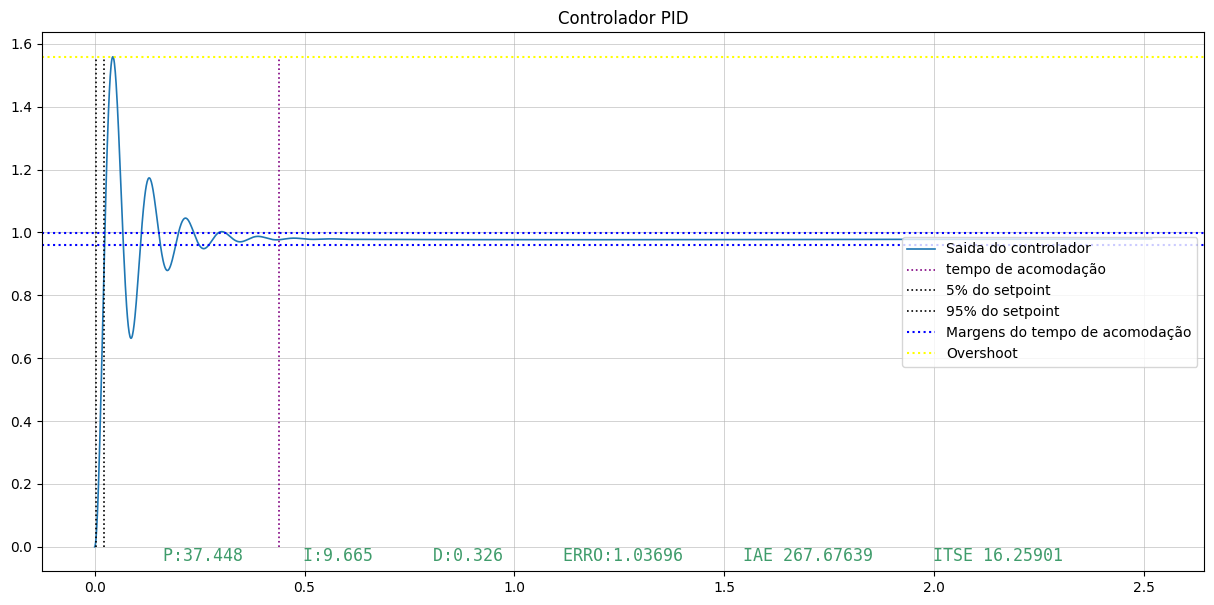

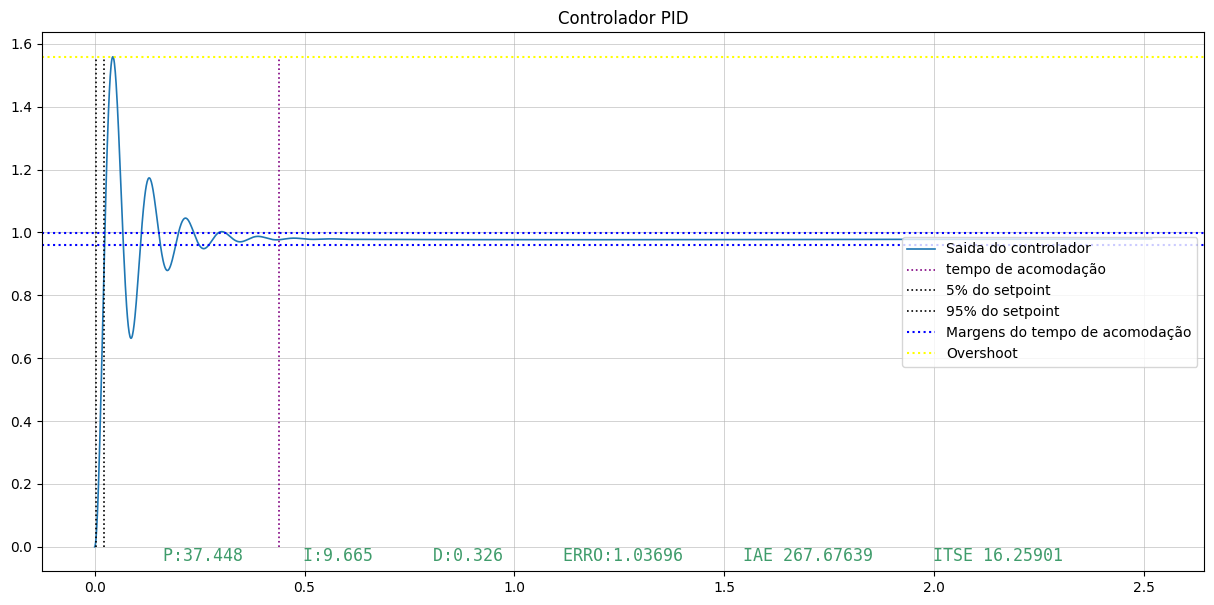

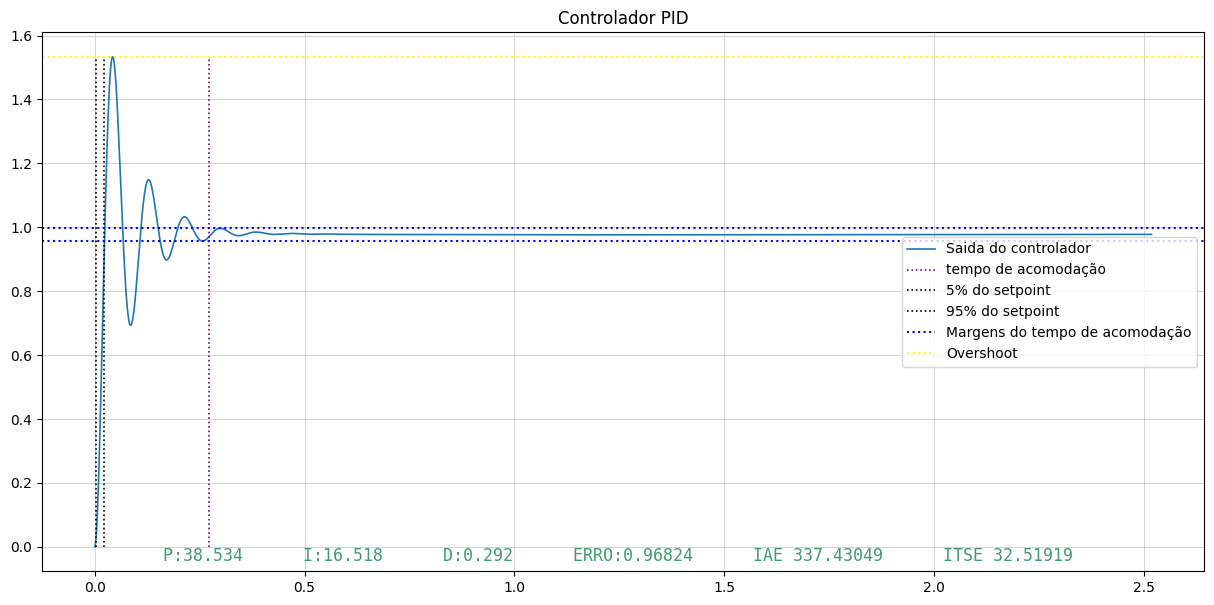

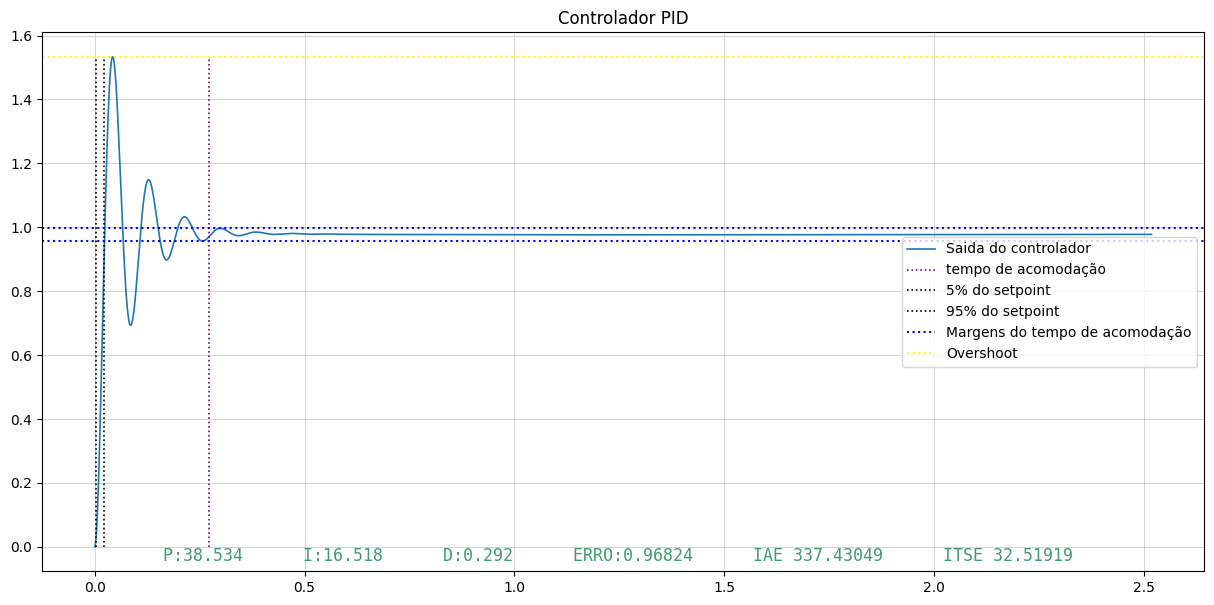

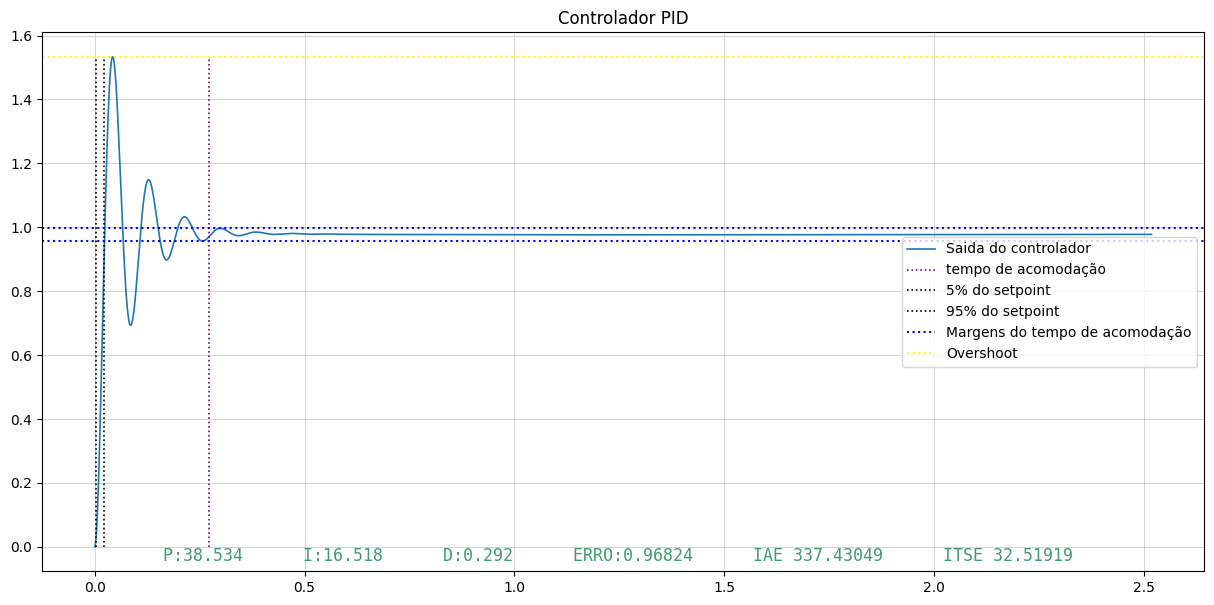

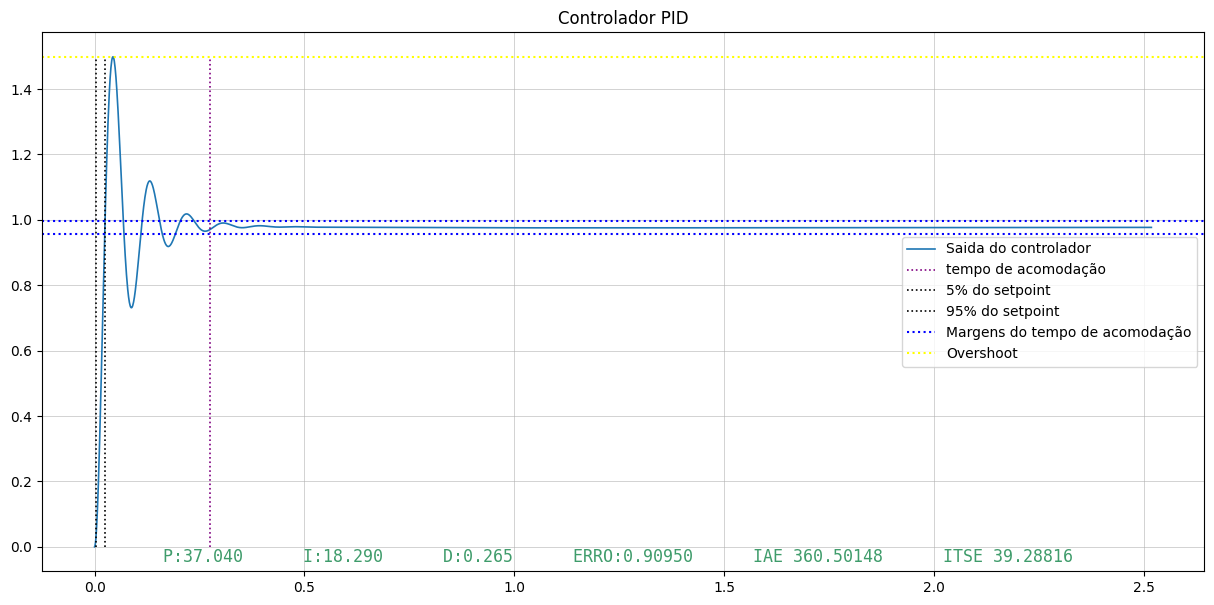

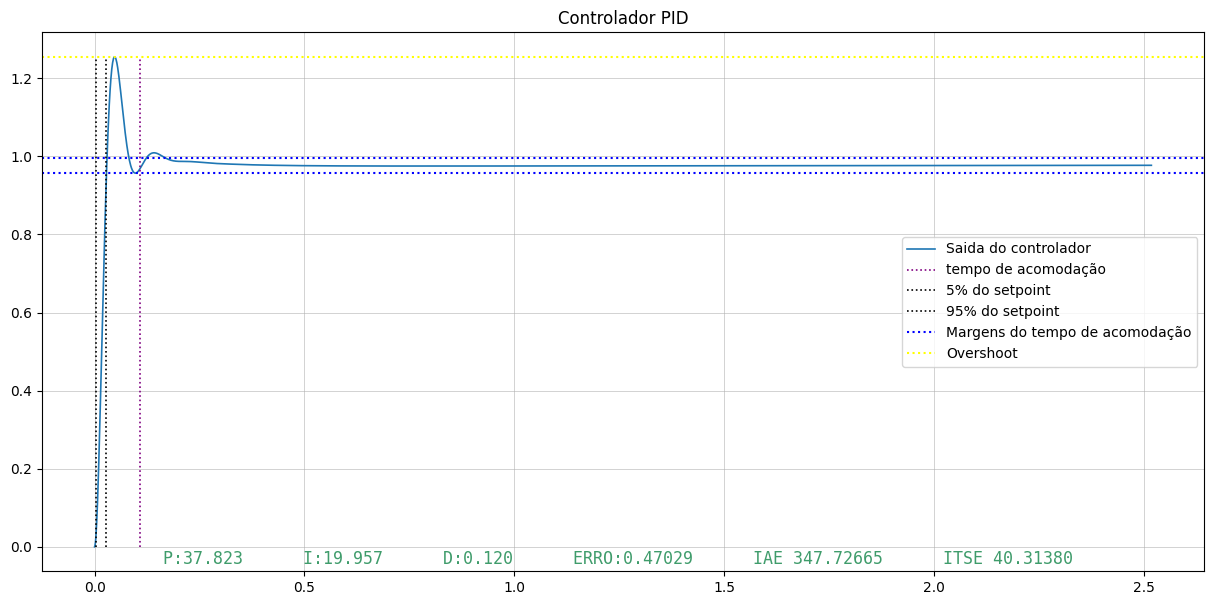

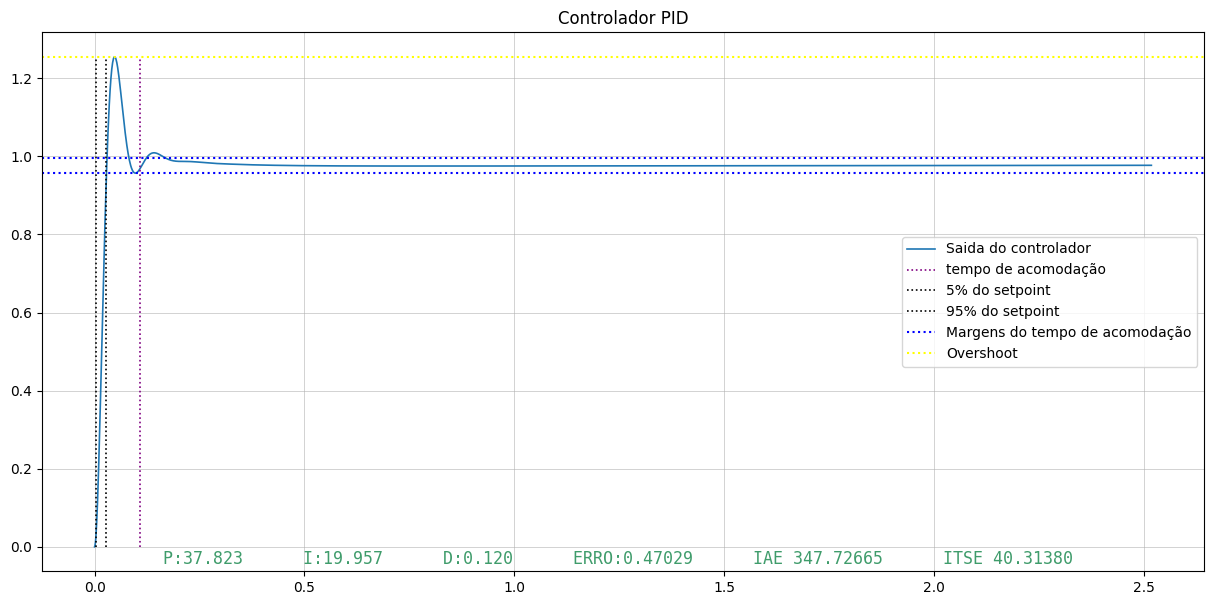

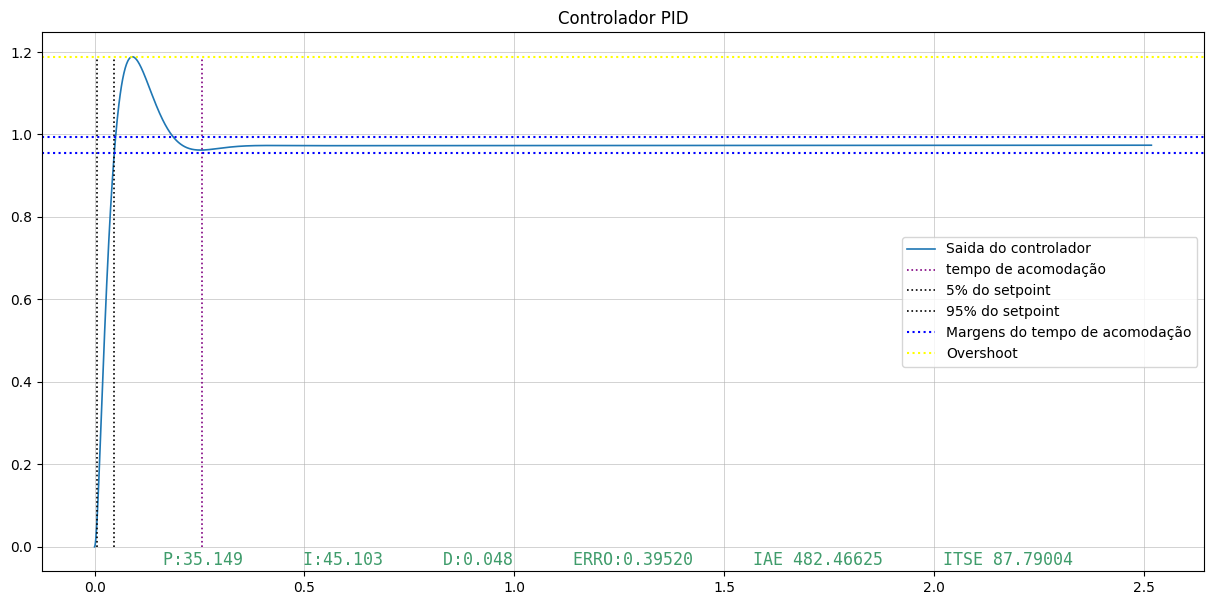

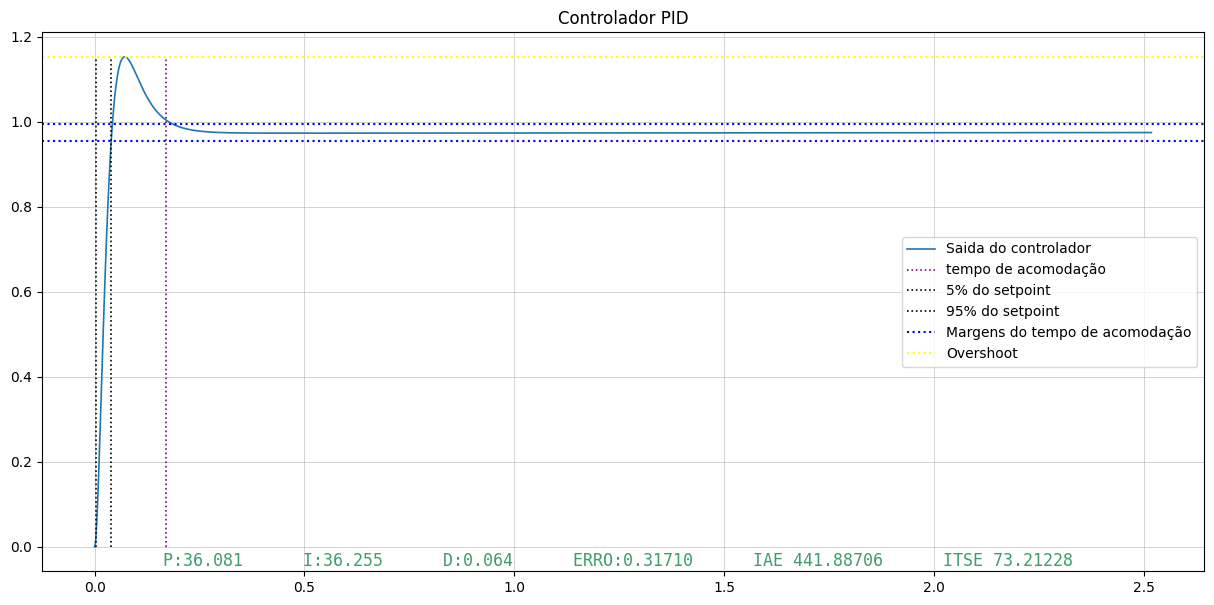

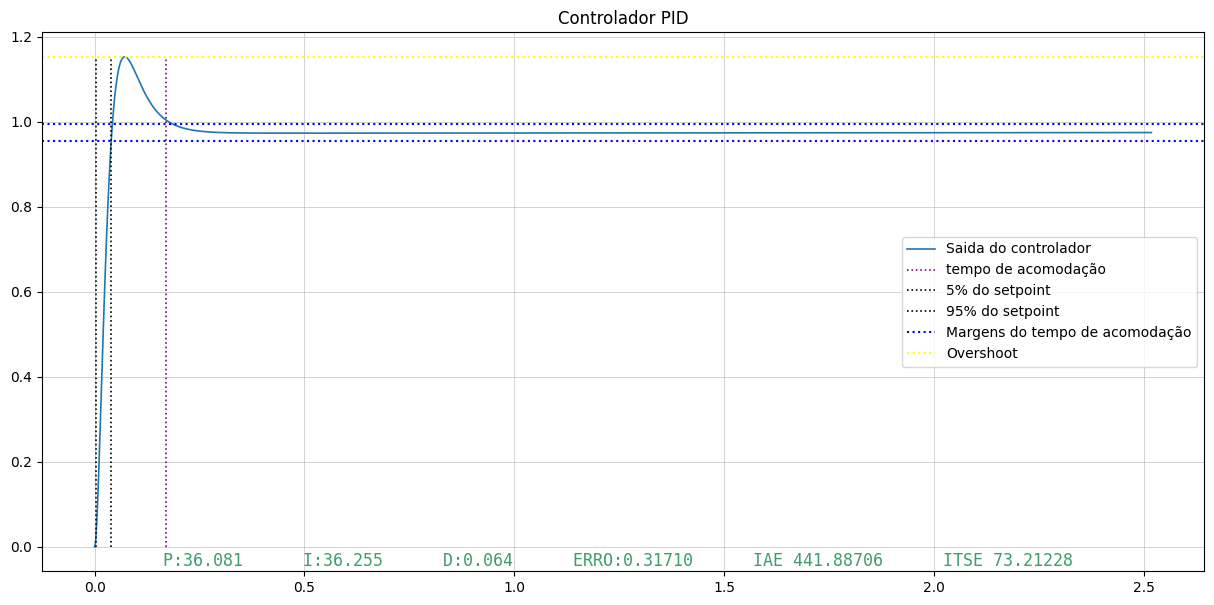

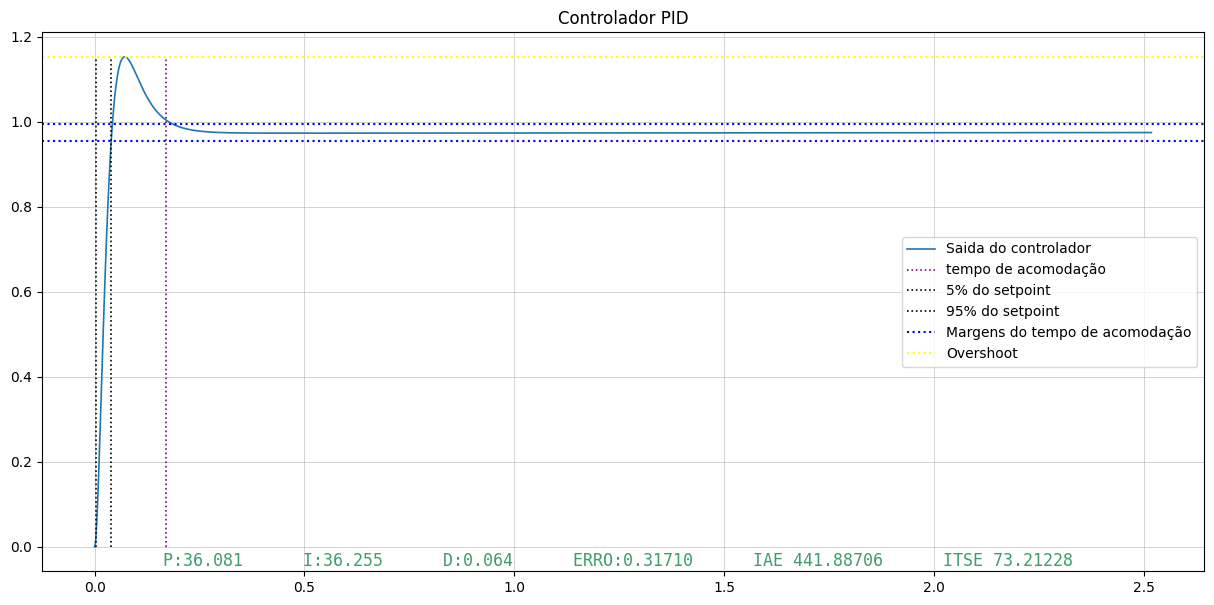

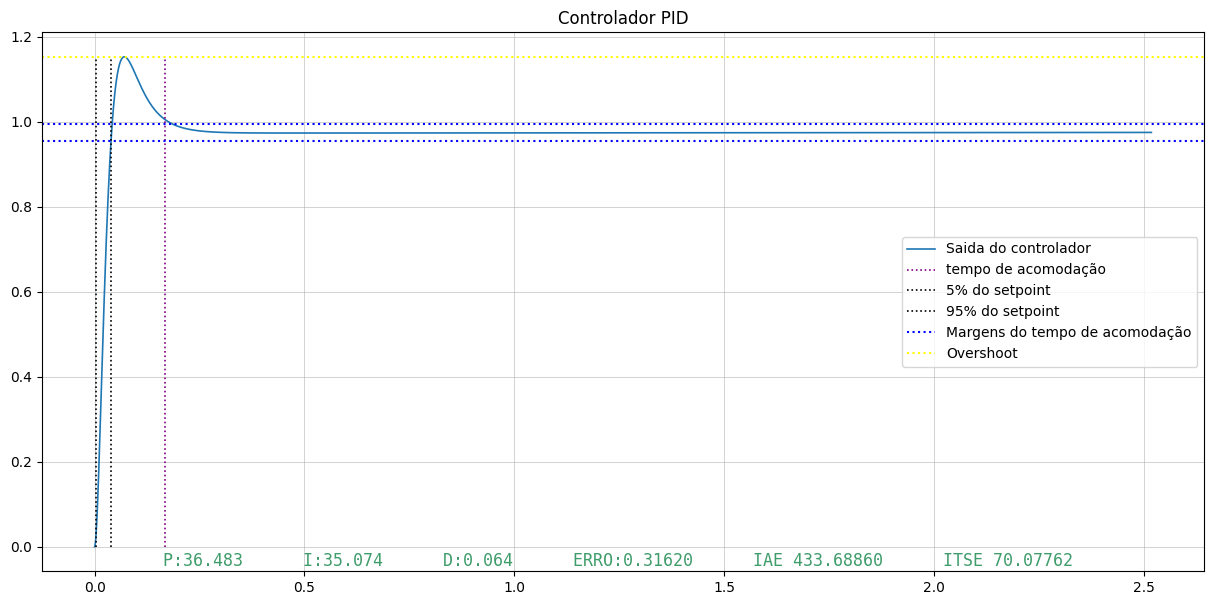

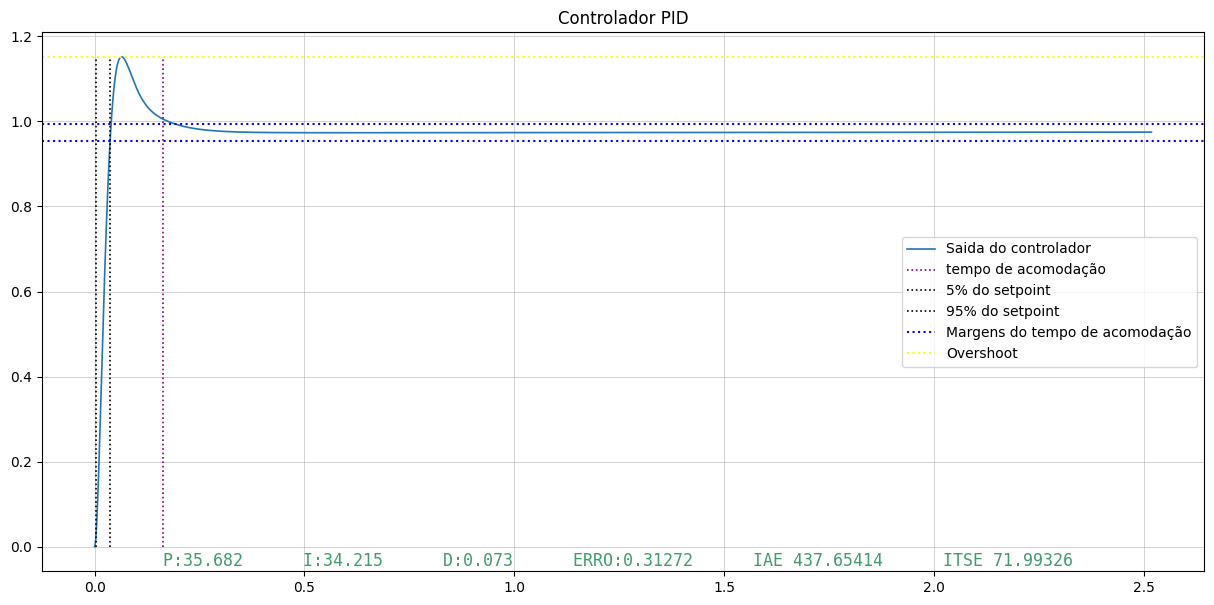

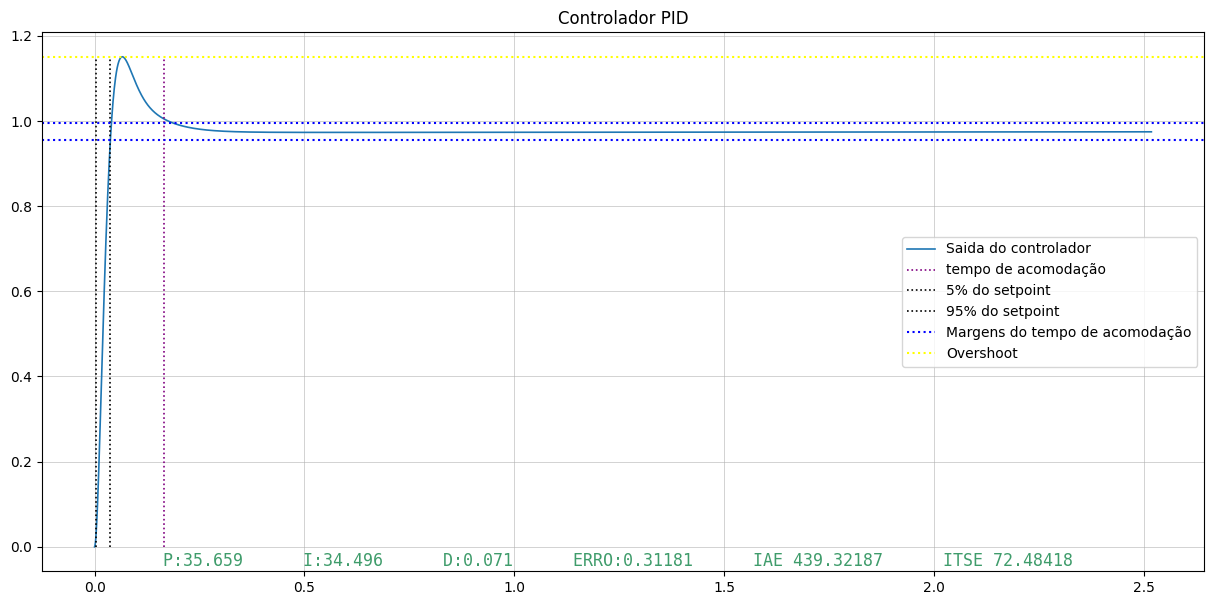

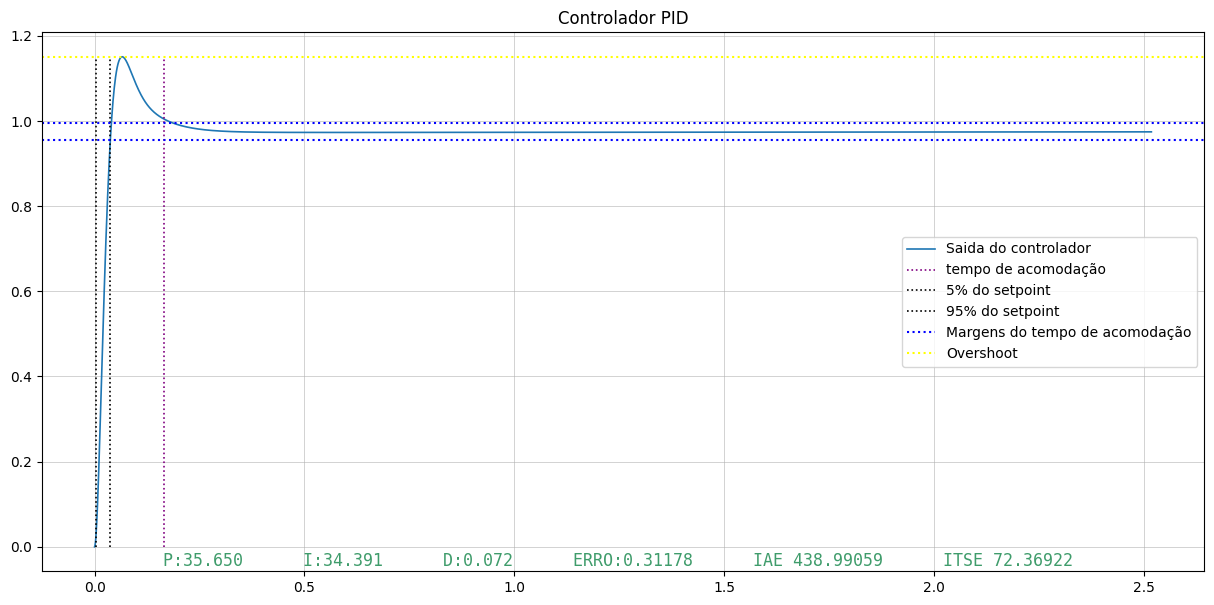

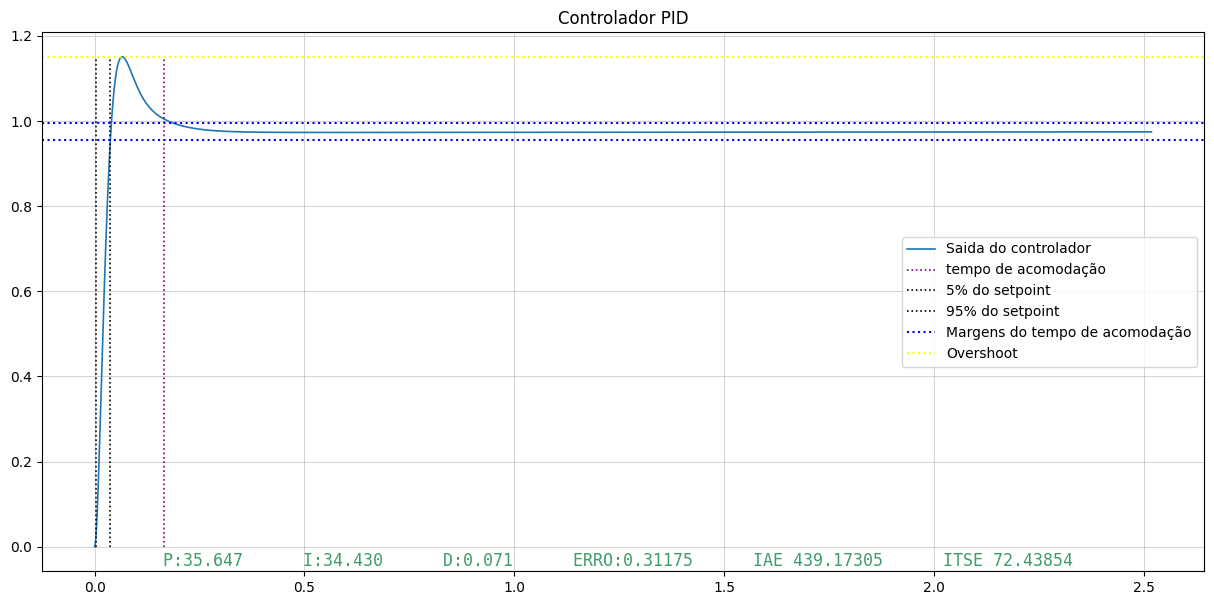

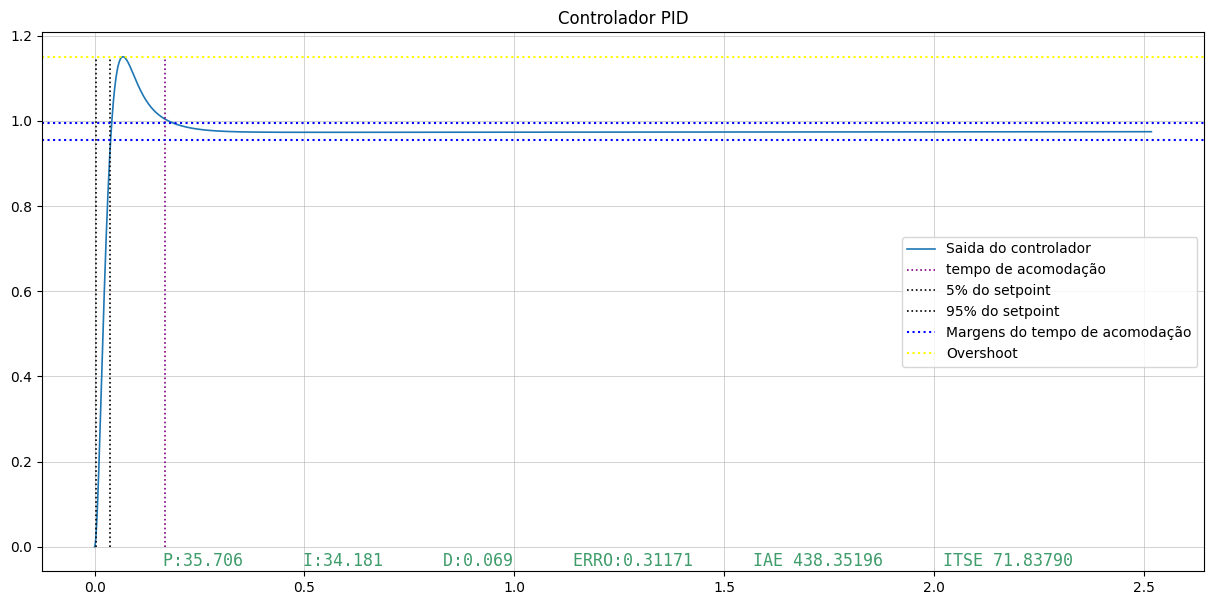

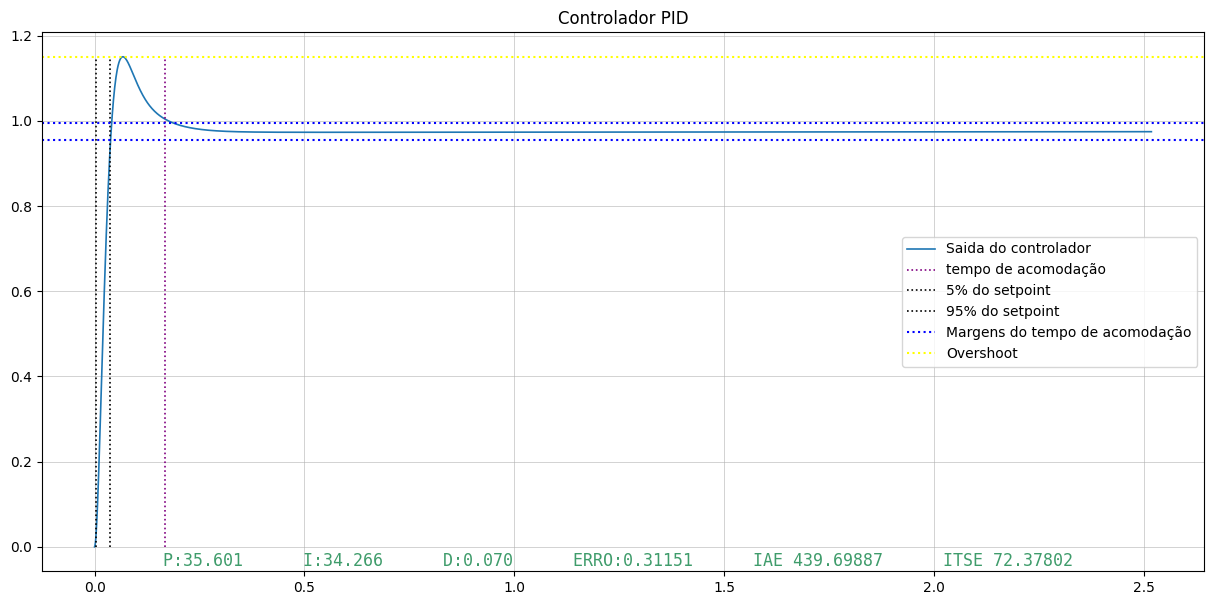

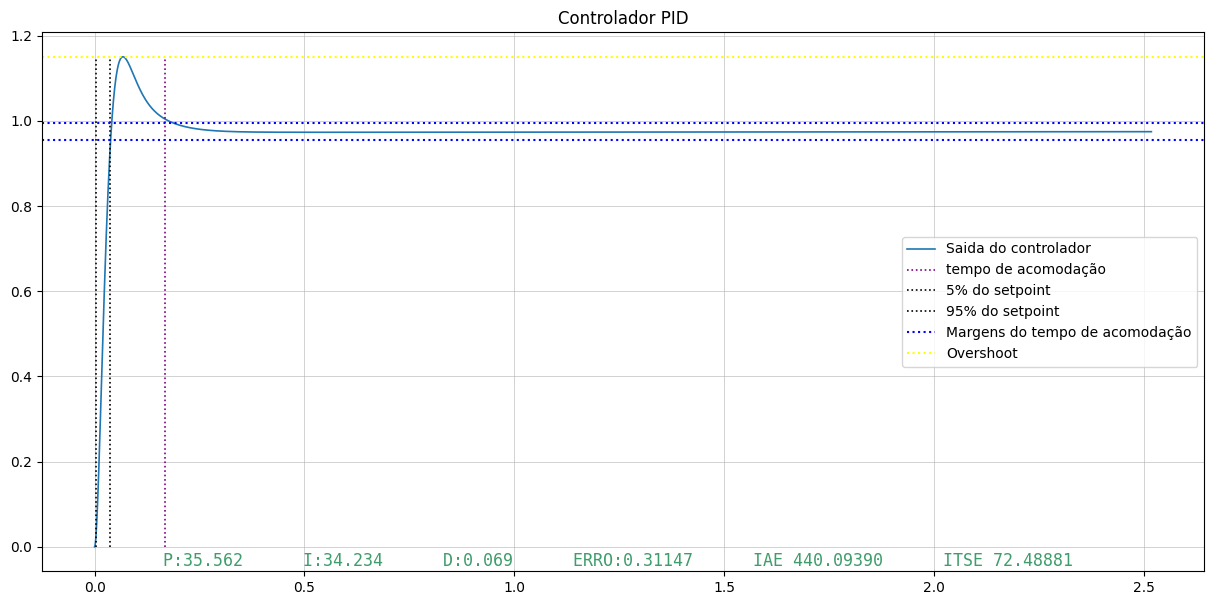

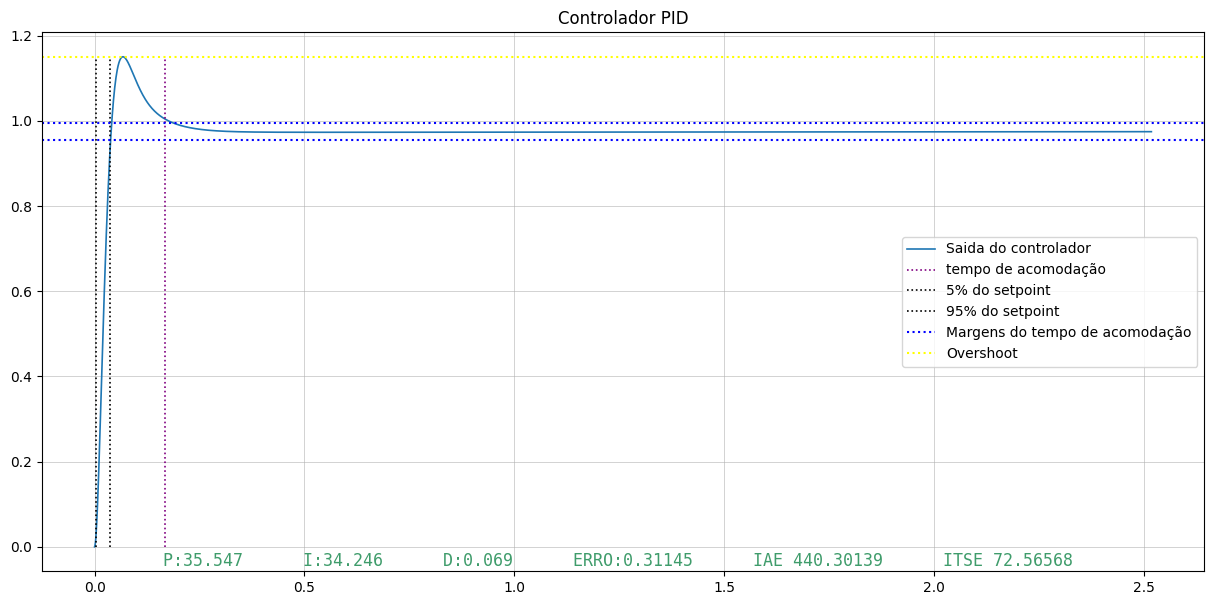

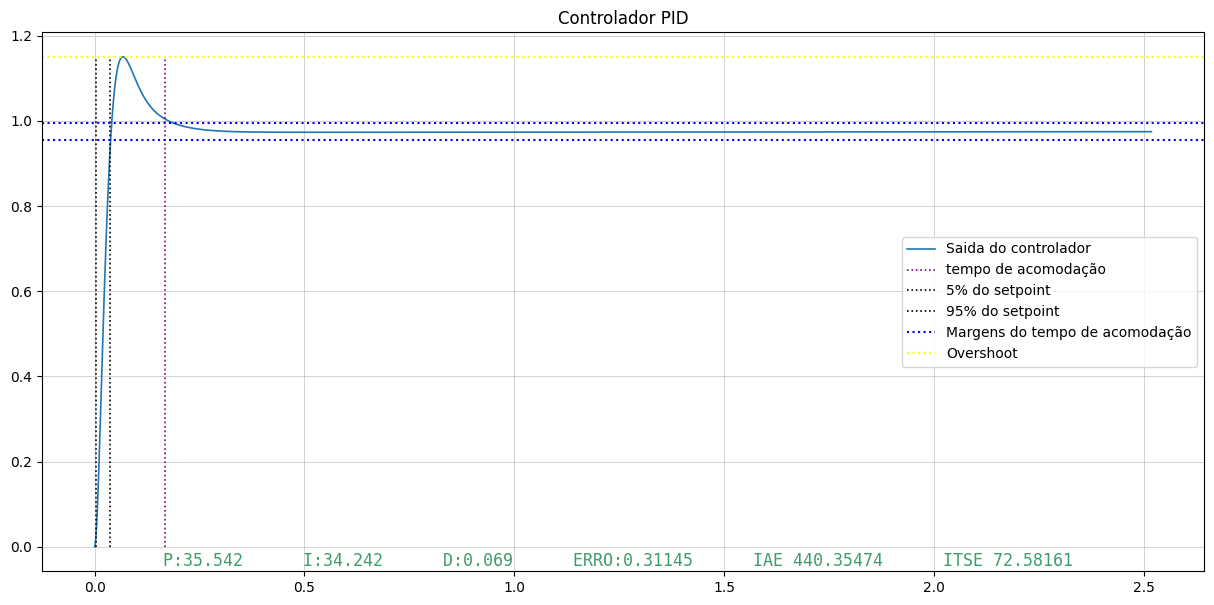

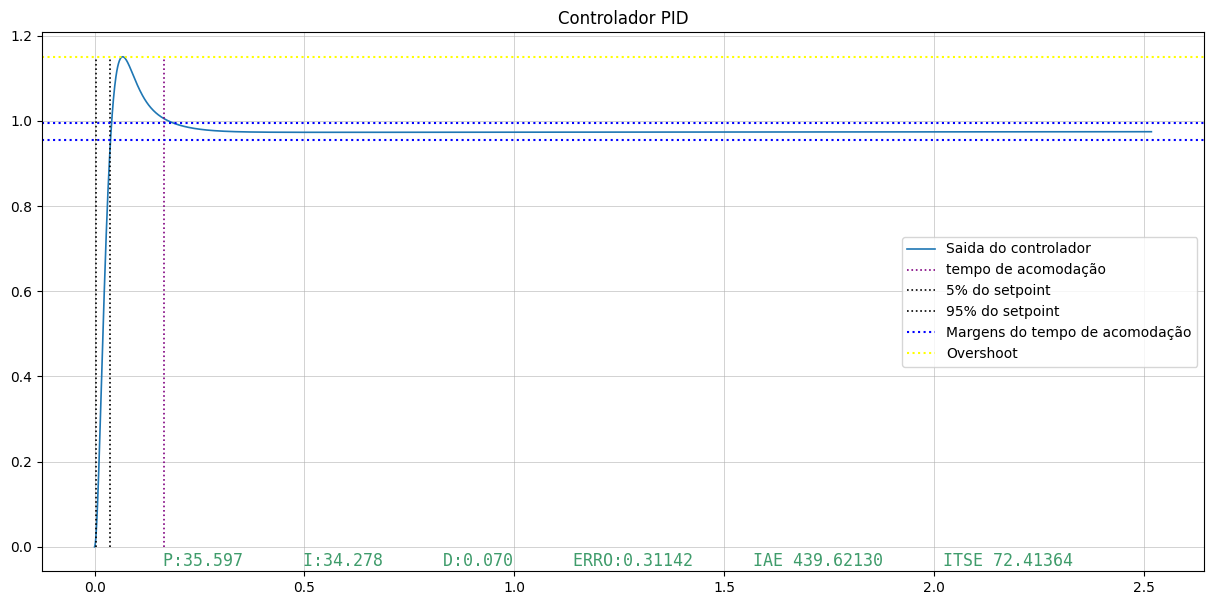

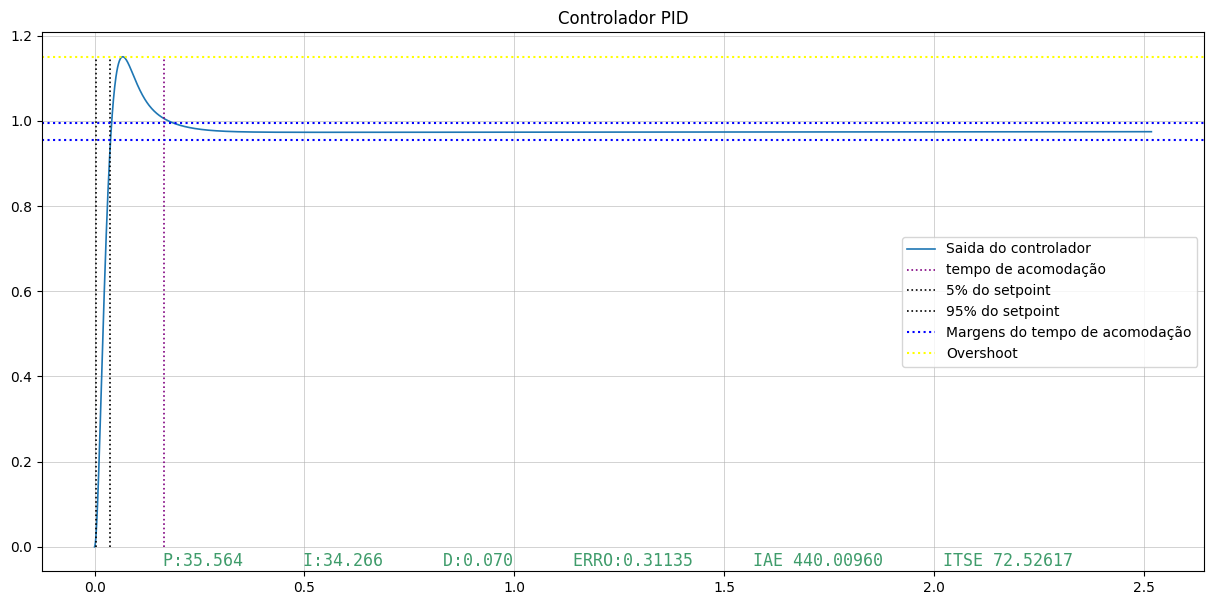

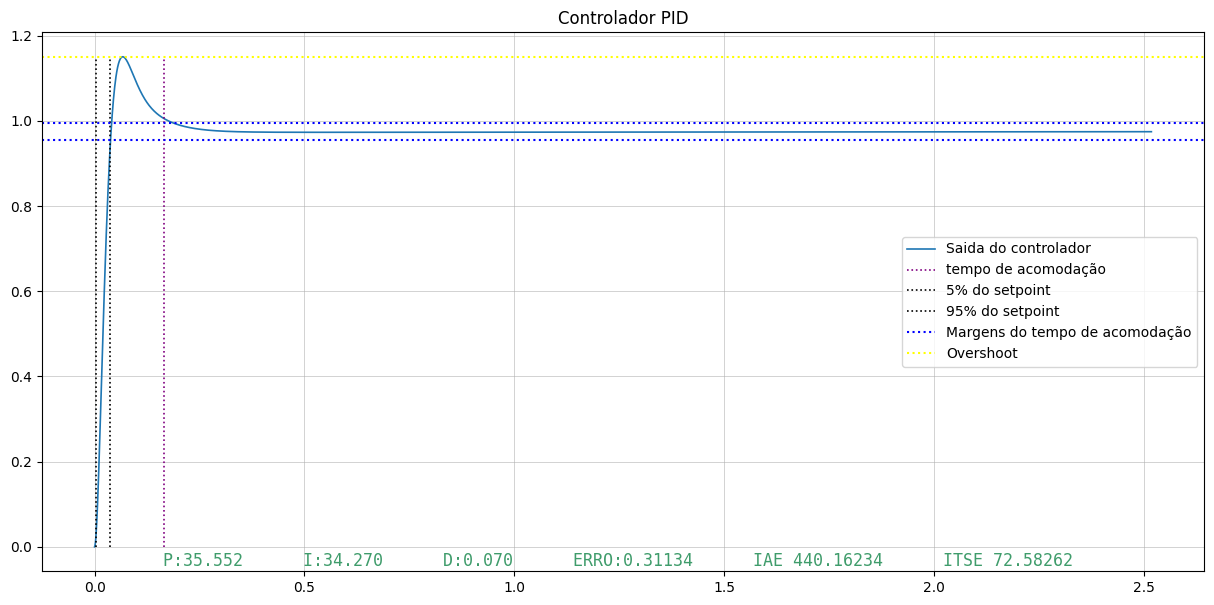

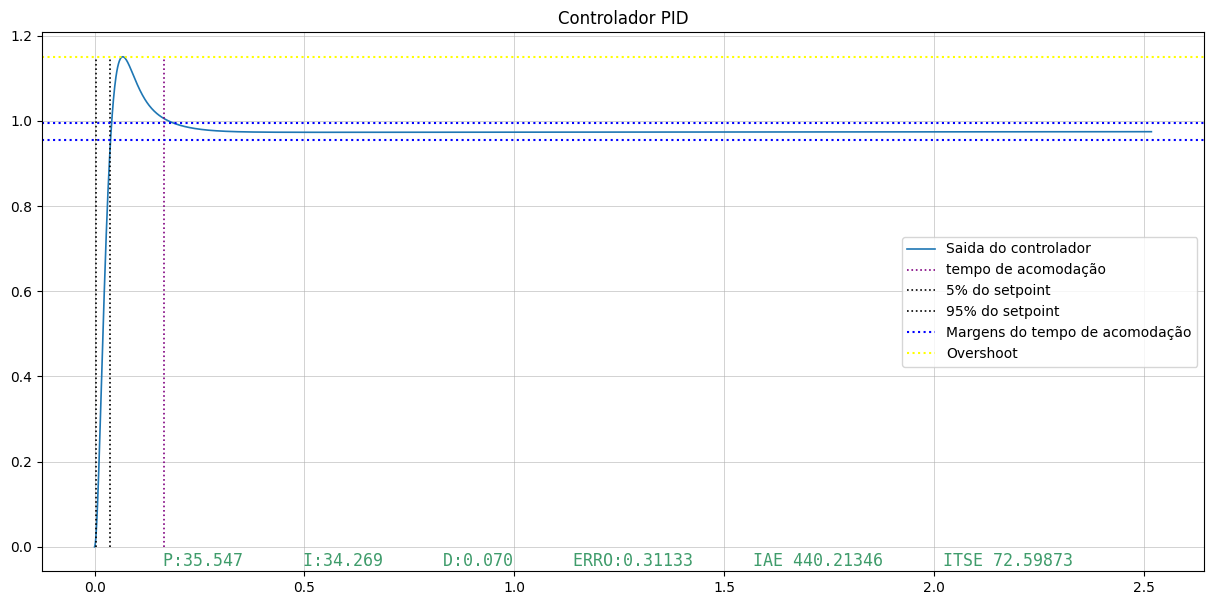

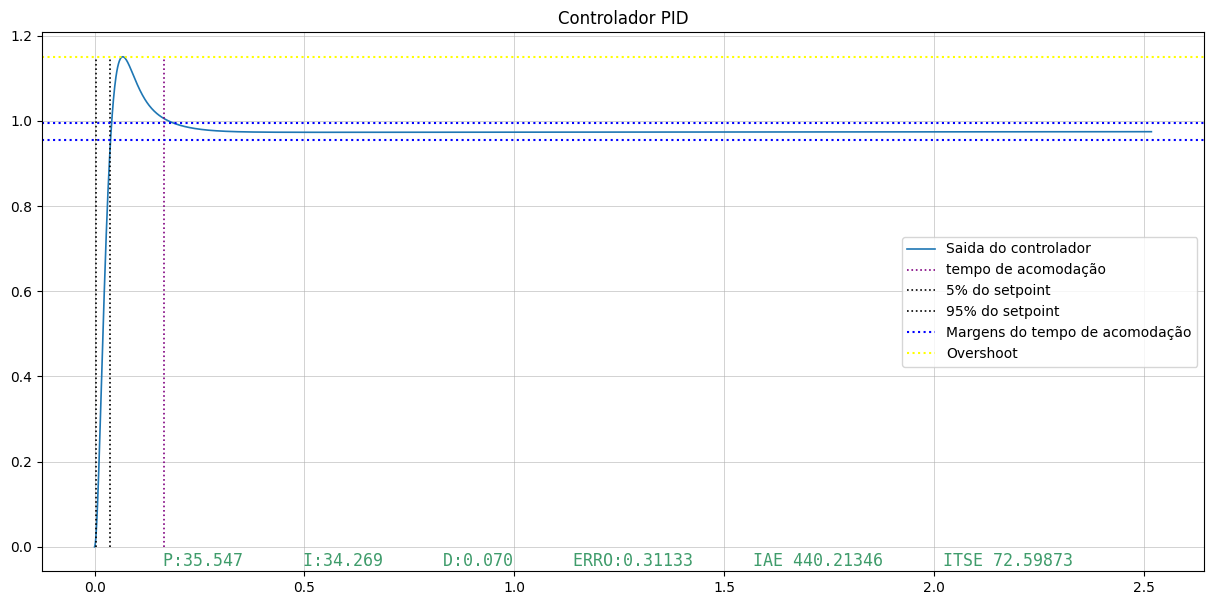

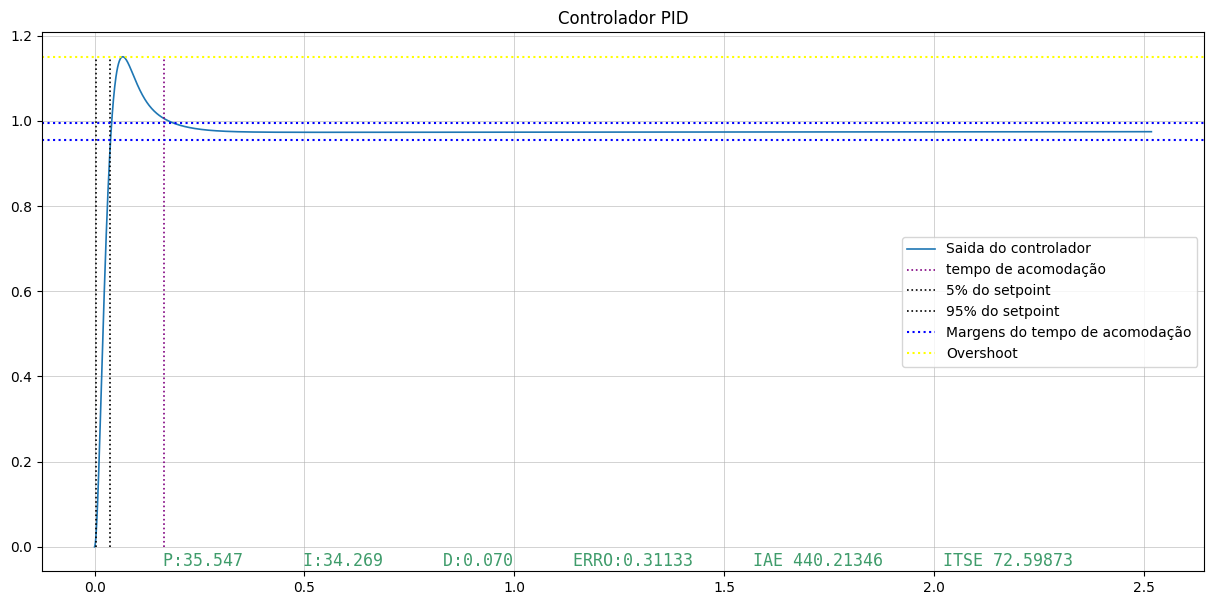

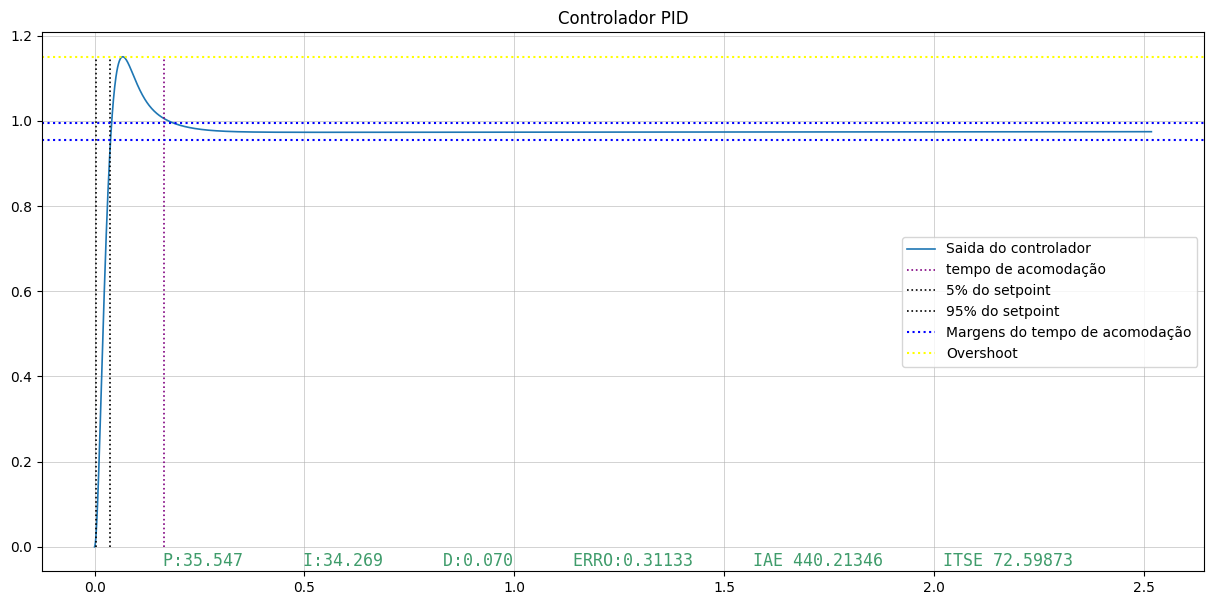

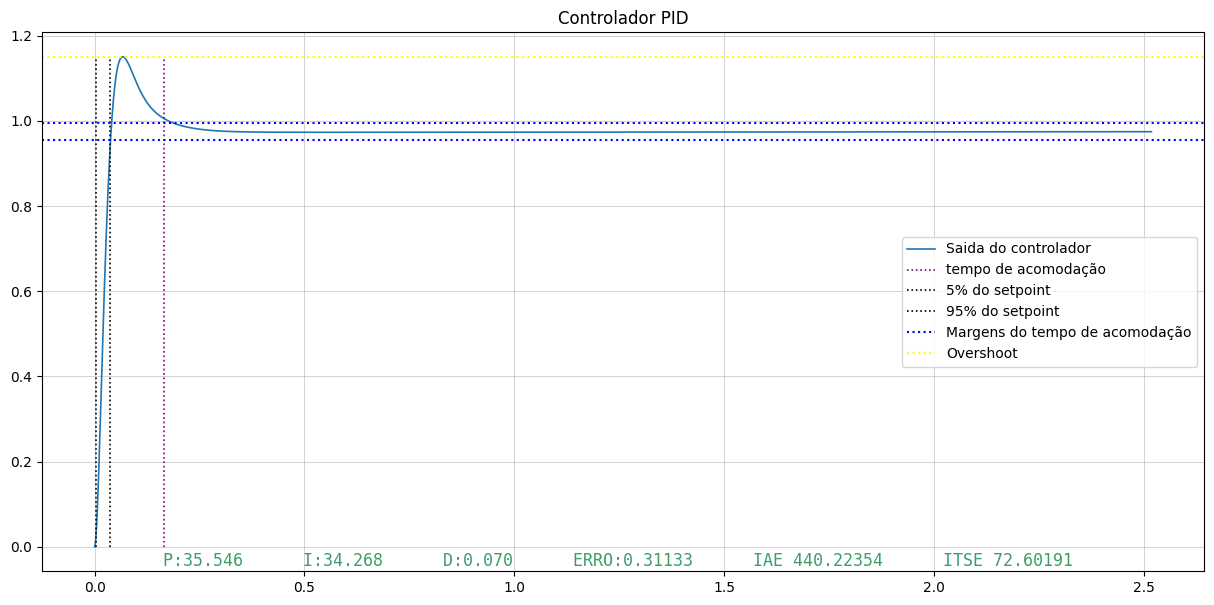

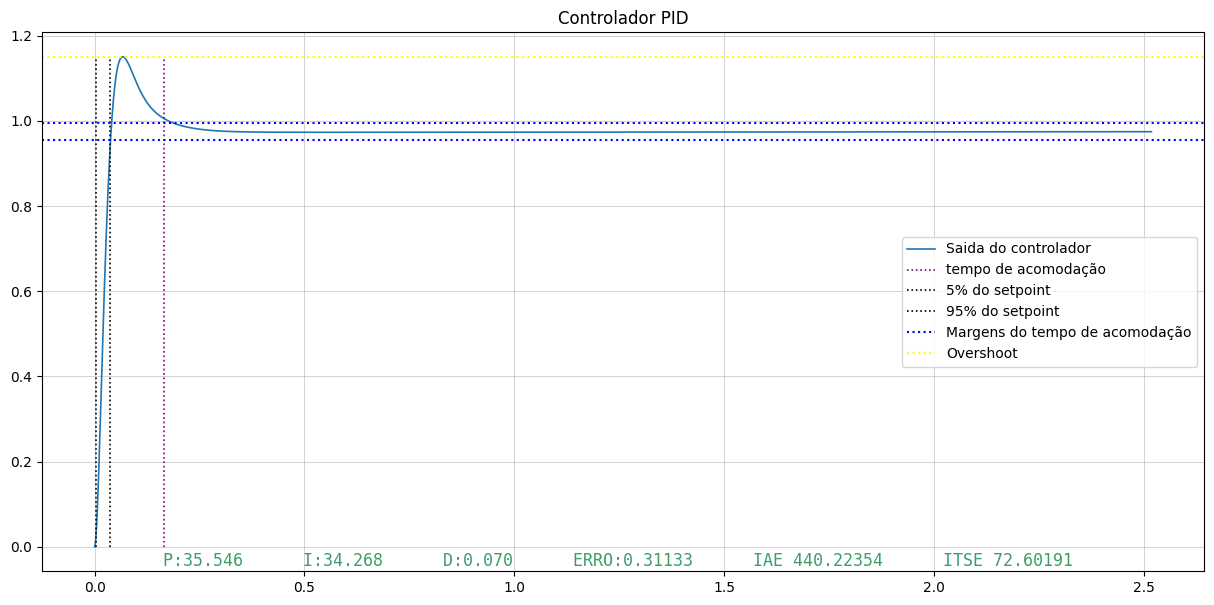

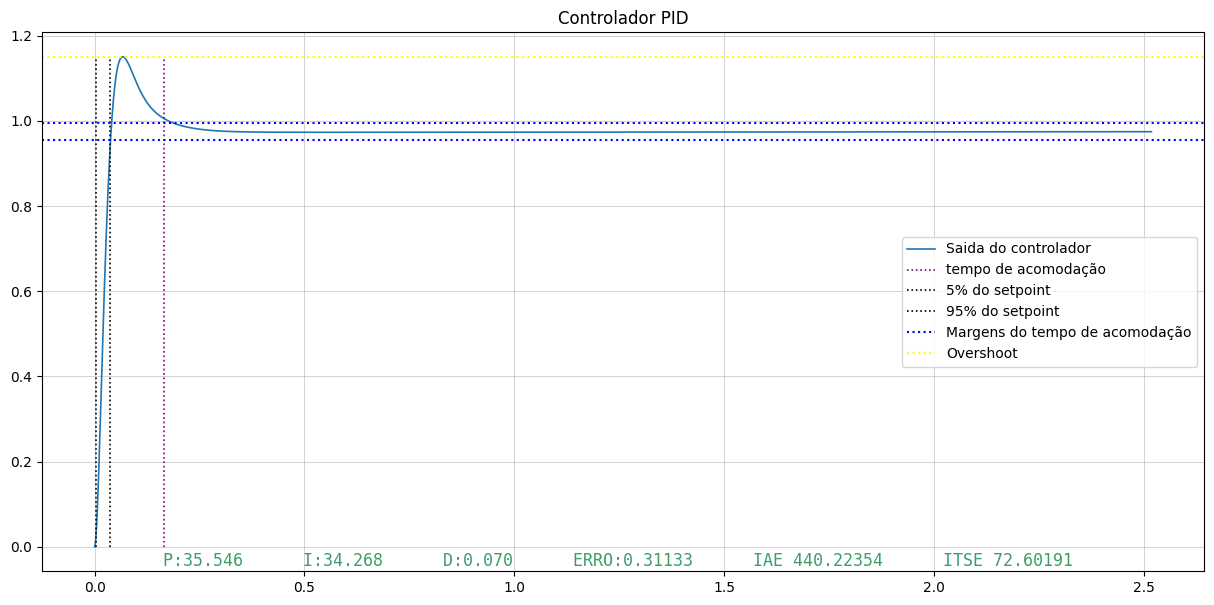

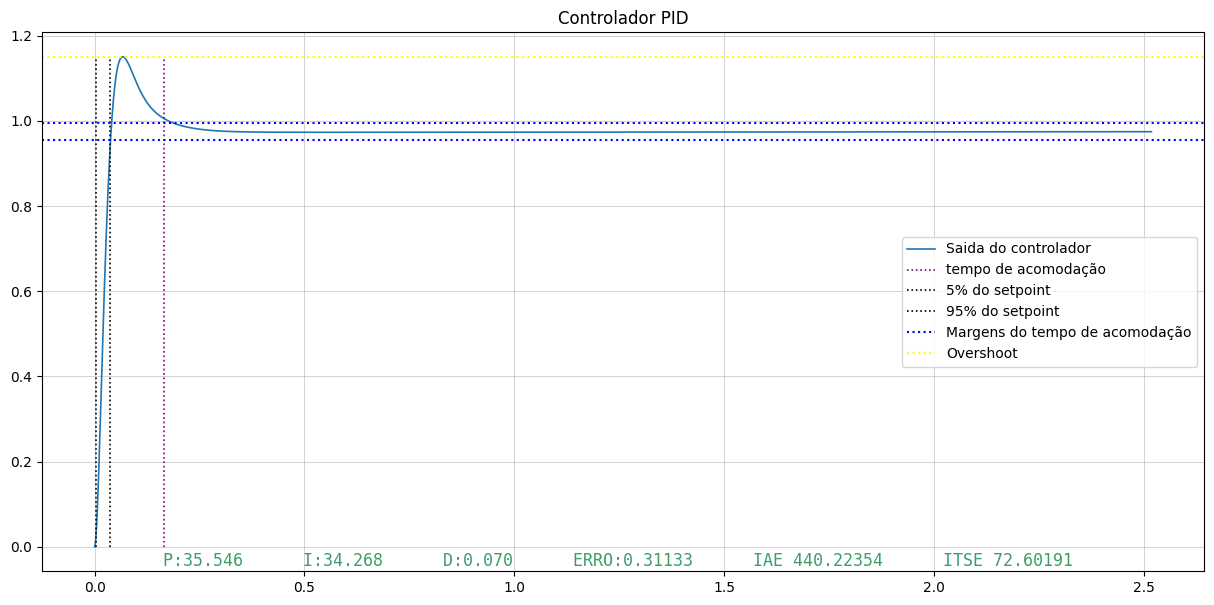

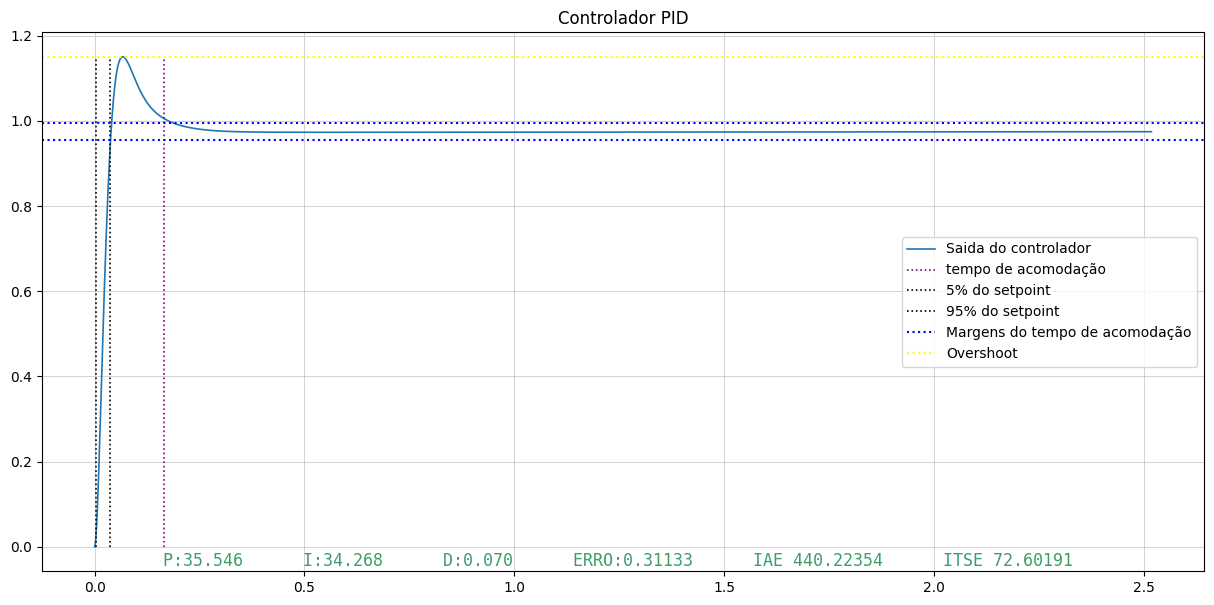

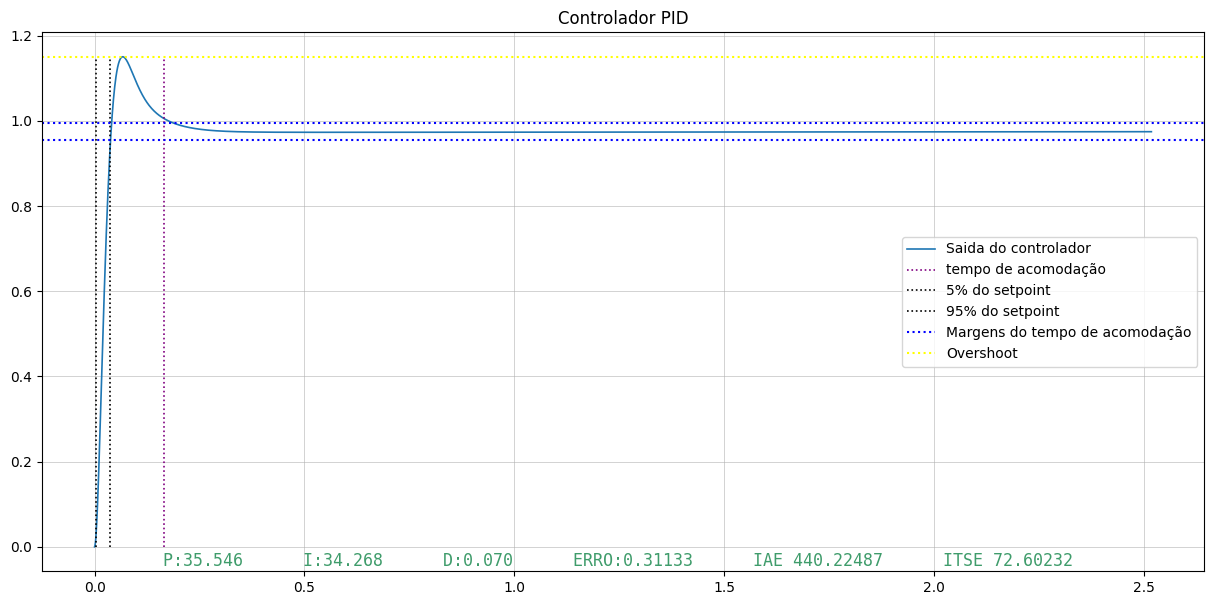

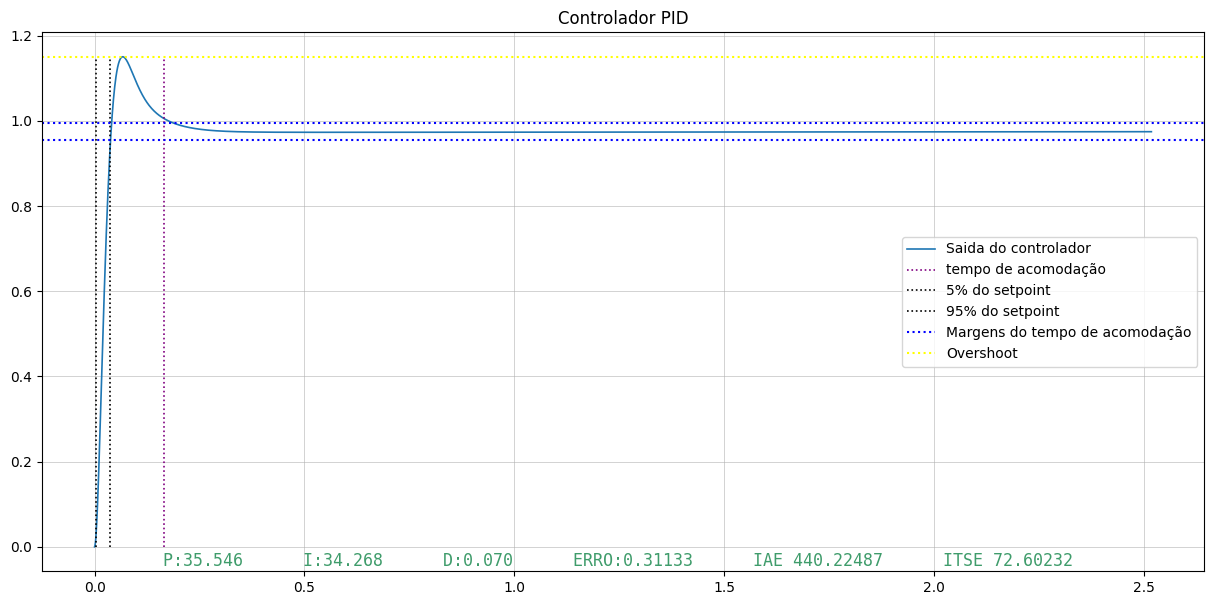

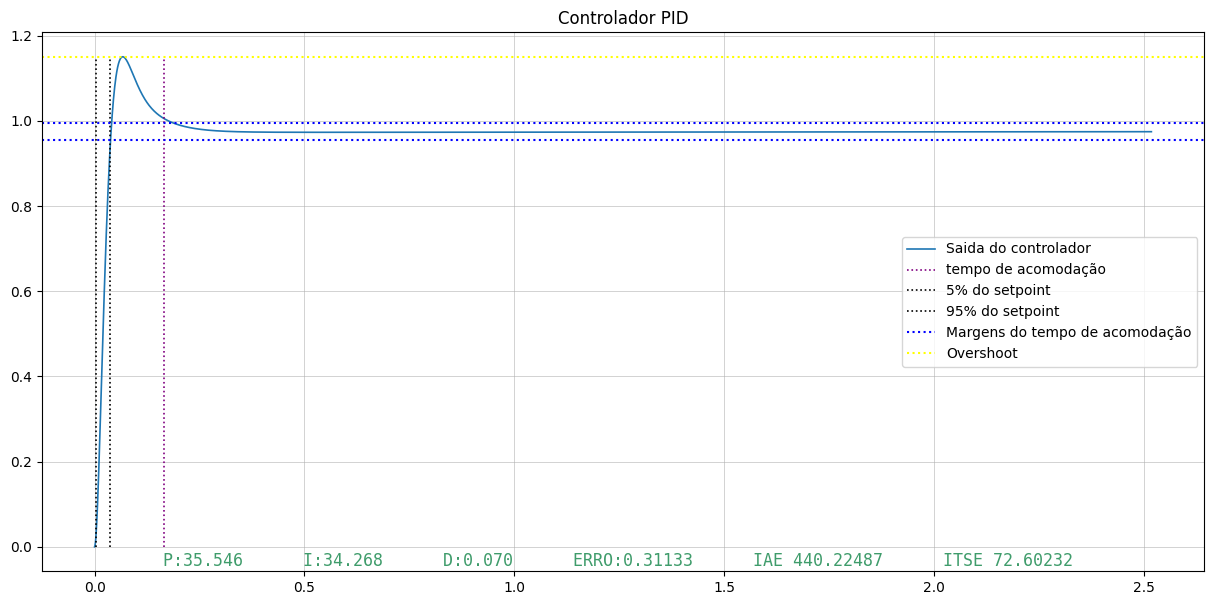

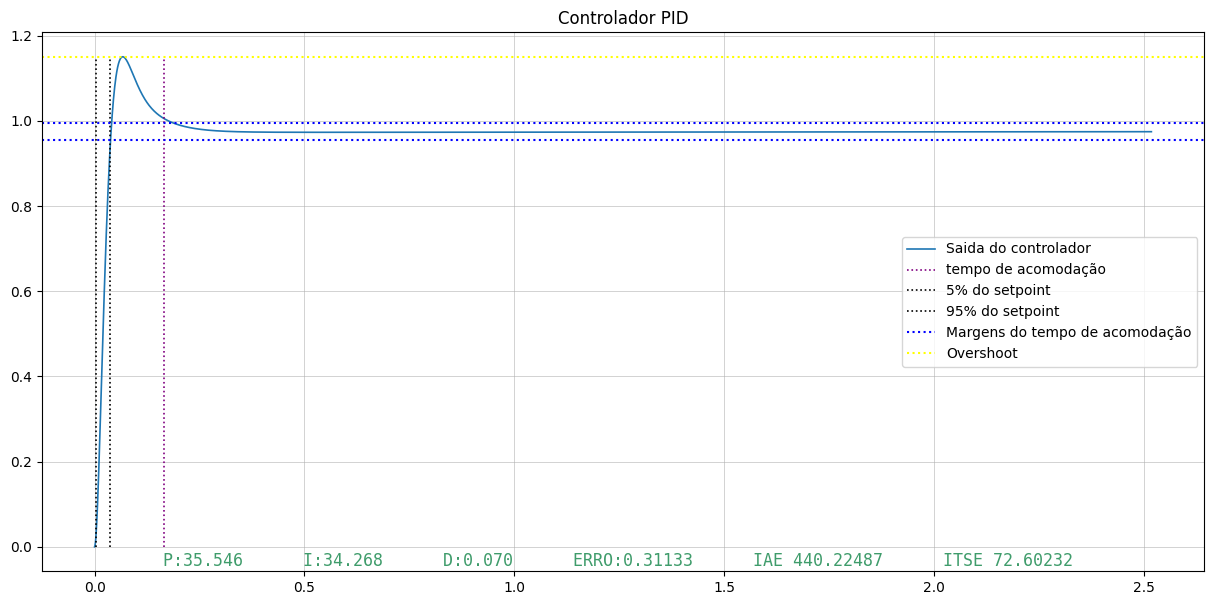

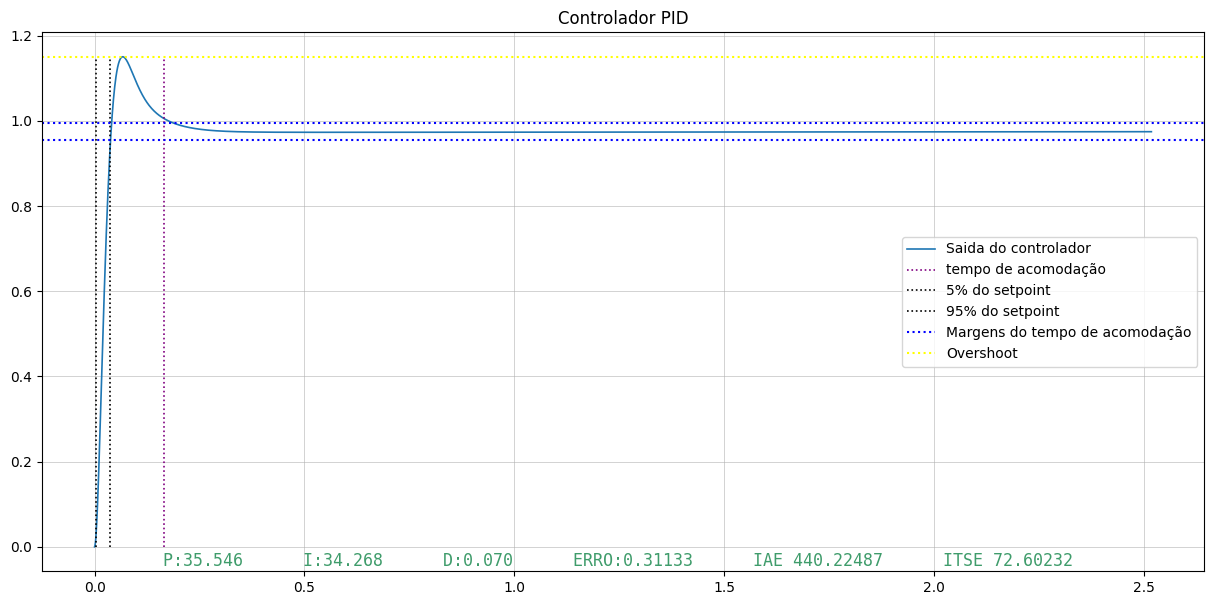

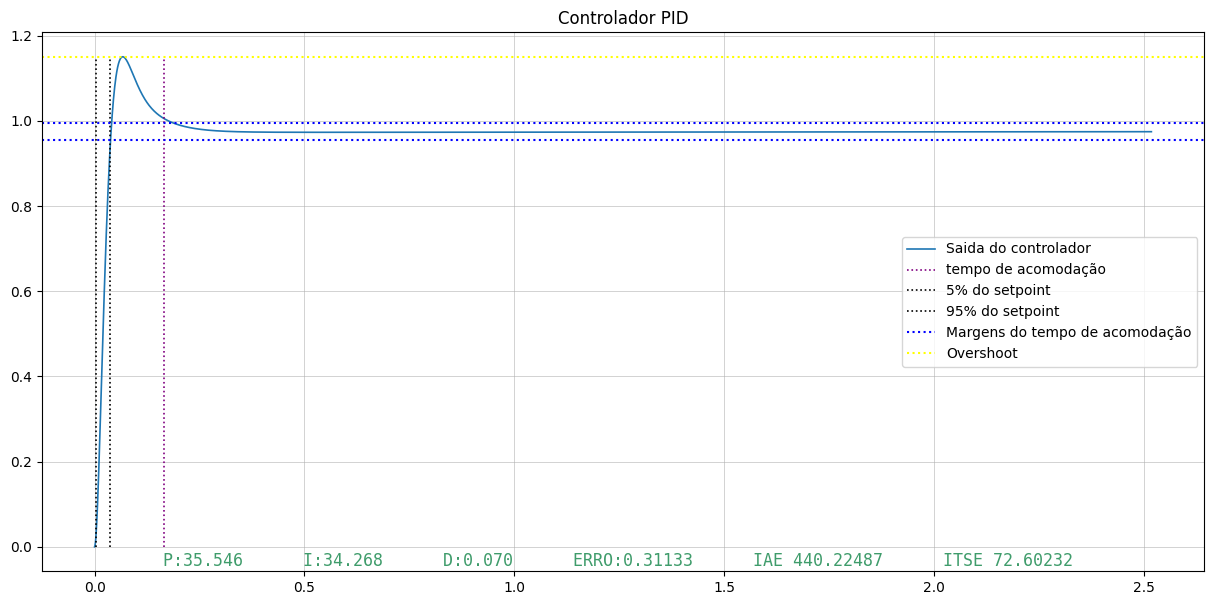

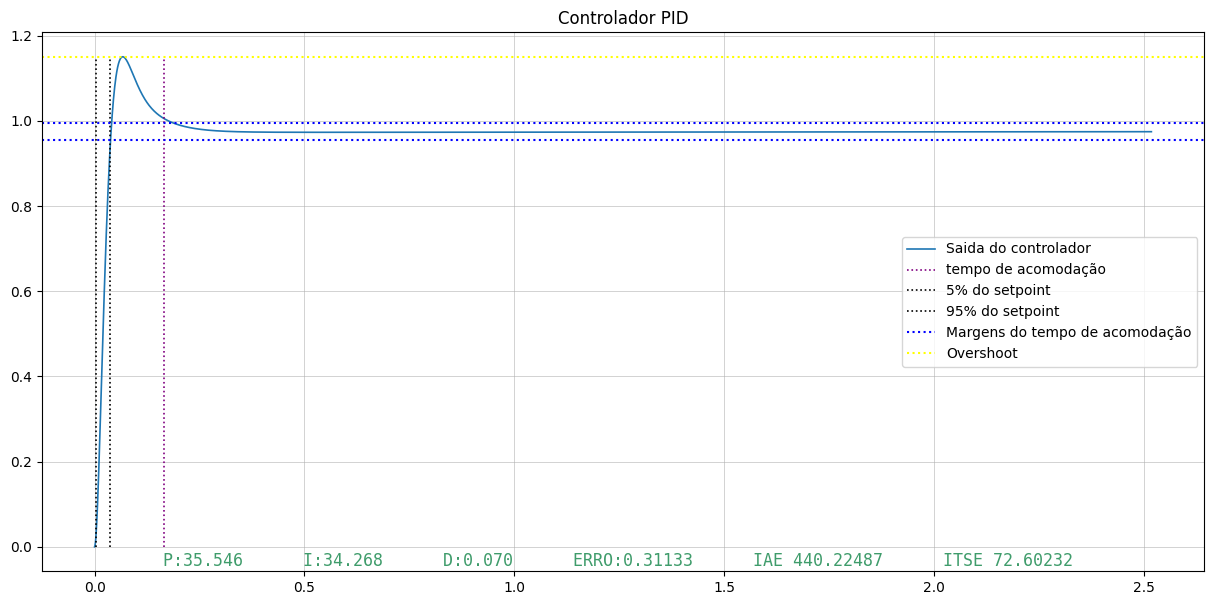

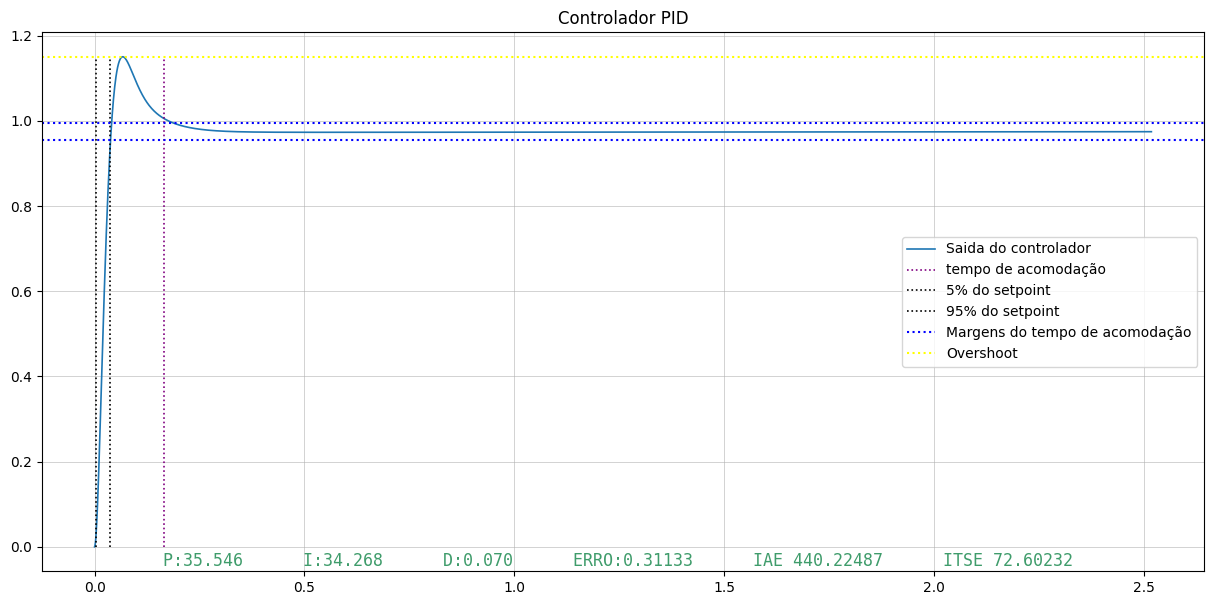

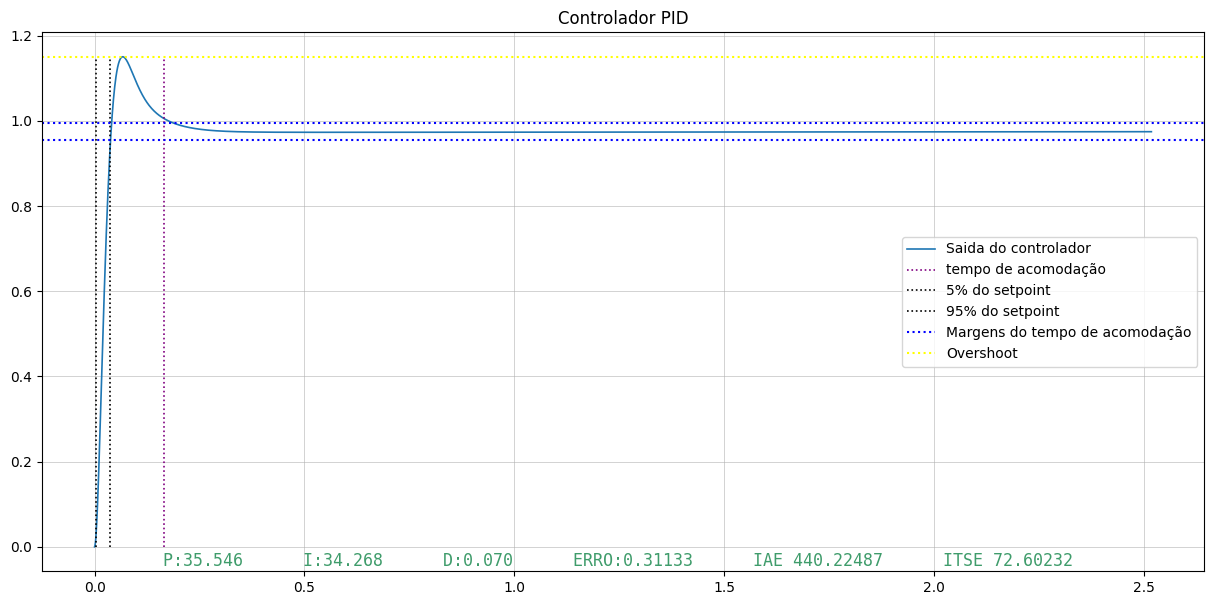

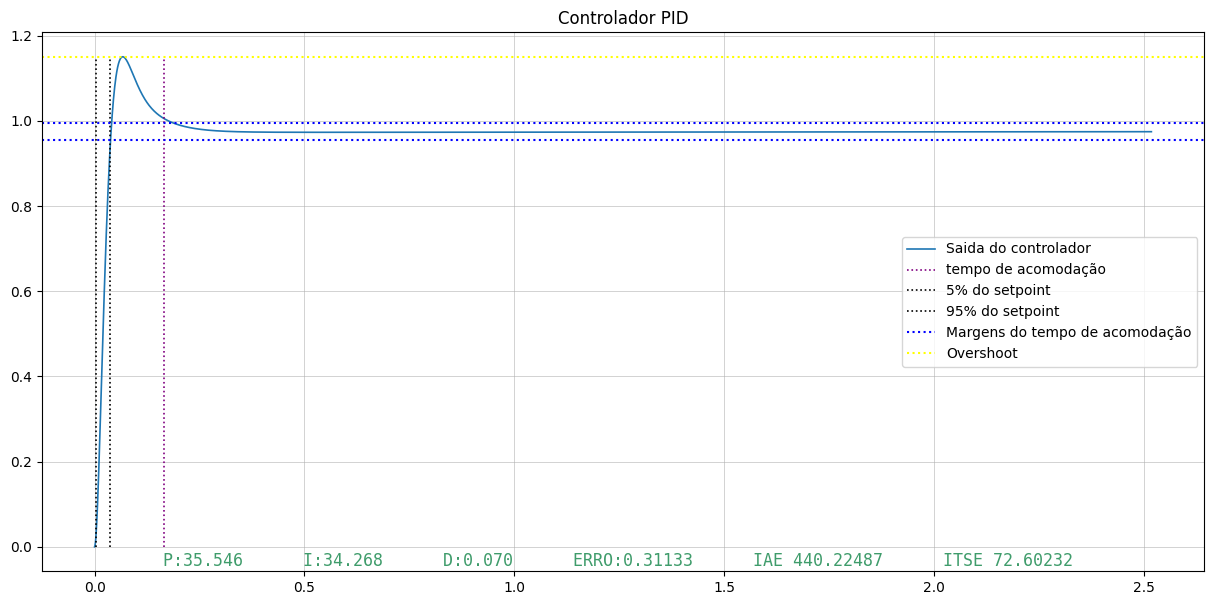

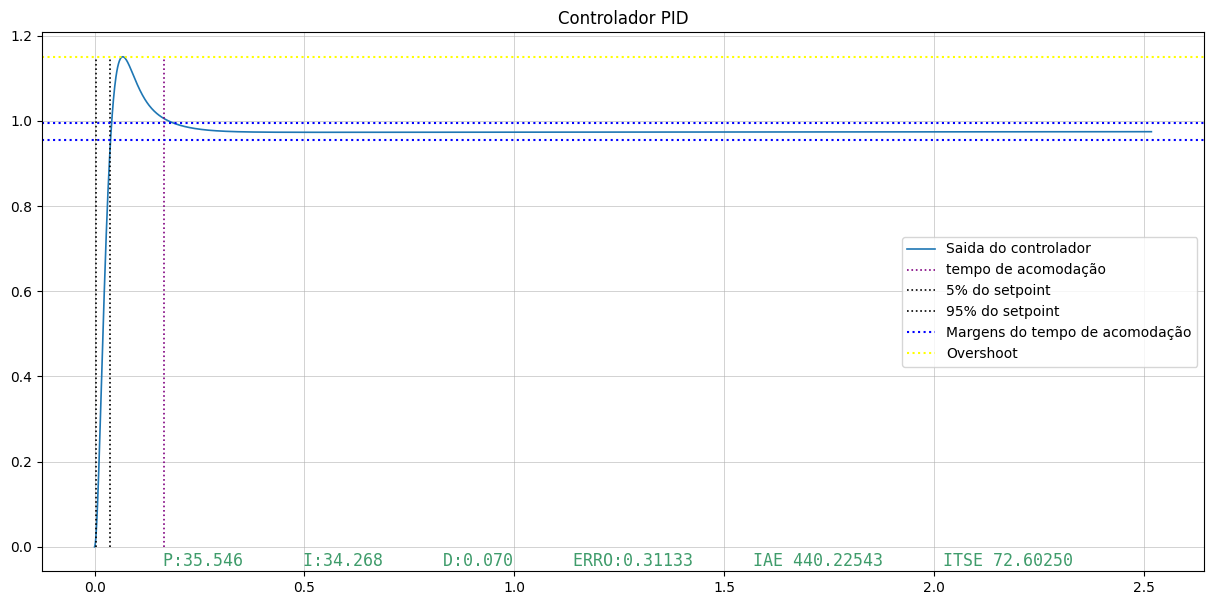

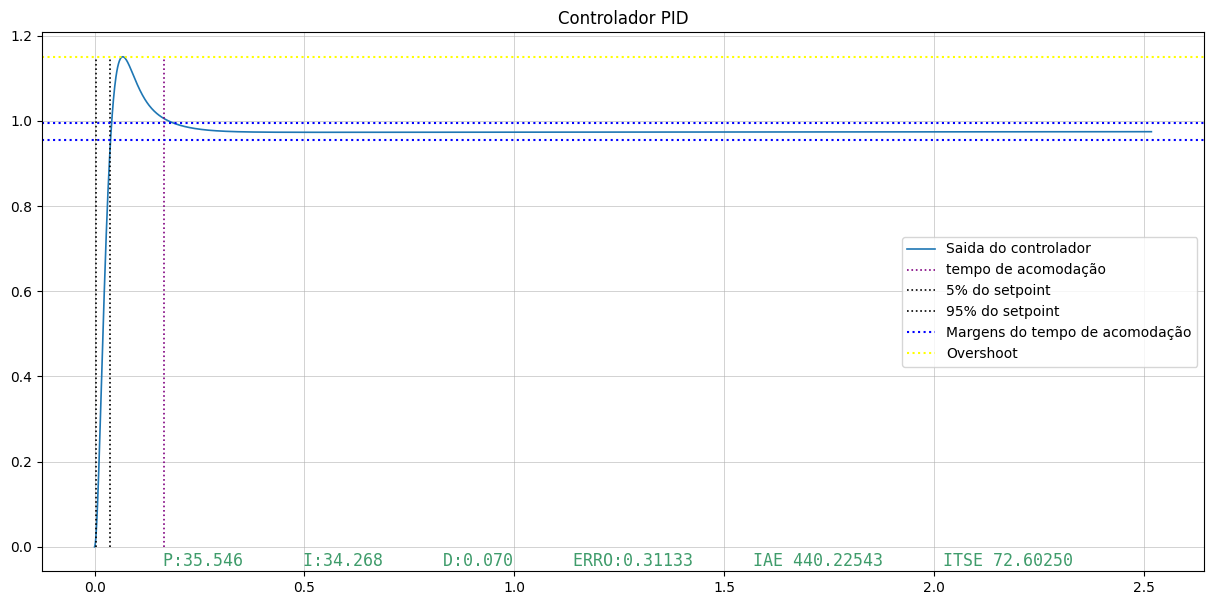

< Critério de parada atinigido, nenhuma particula teve uma melhora maior que 0.001 por 5 iterações consecutivas. >
< 57 iterações antes de atingir o critério. >
< O tempo médio das iterações foi 3.458s. >
< Tempo total de execução: 3.27min


In [4]:
ini = time()
num = [16]
den = [1,4,16]

set_point = 1.0

pid_param = list()


w = 0.75 # fator de inercia
c1 = 1.0  # fator cognitivo
c2 = 0.5 # fator social
 
n_part = 10 # numero de particulas
parada = 0.001 # critério de parada
dim = 3 # dimensão da entrada 

min = [0.001, 0.001, 0.001] # minimo do sistema
max = [100.0, 100.0, 100.0] # maximo do sistema

pid_param.append(num)
pid_param.append(den)
pid_param.append(set_point)


sistema = list()

particulas = PSO.inicializate(n_part, dim, min, max)  

sistema = PSO.update_sistem(sistema,particulas,min,max,w,c1,c2,parada,dim,pid_param)
fim = time()

print(f"< Tempo total de execução: {round((fim-ini)/60, 2)}min")

In [5]:
sistema2df(sistema,'C:\\Users\\vitor\\Documents\\GitHub\\IC-IT\\resultados')